# Code for Figure 2


## Set-up

In [40]:
import numpy as np
import pandas as pd
import TDAtools as TDAtl
import matplotlib.pyplot as plt
import matplotlib.colors as clt
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec

type_dictionary = {'coral': 0, 'turf': 1, 'macroalgae': 2}

In [41]:
# Functions

def plot_coral_image(ax, image, size=25, colors=('#EE8382', '#508991', '#172A3A')):
    # Flip image

    # Parameters
    levels = [0, 1, 2]
    cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')

    # Plot
    ax.imshow(image, cmap=cmap, norm=norm)
    ax.set_xticks(np.arange(-.5, size, 1), minor=True)
    ax.set_yticks(np.arange(-.5, size, 1), minor=True)
    ax.set_frame_on(True)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.grid(color='black', linestyle='-', alpha=0.1, linewidth=.2, which='minor')
    ax.tick_params(which='minor', top=[], left=[], right=[], bottom=[])

    return ax



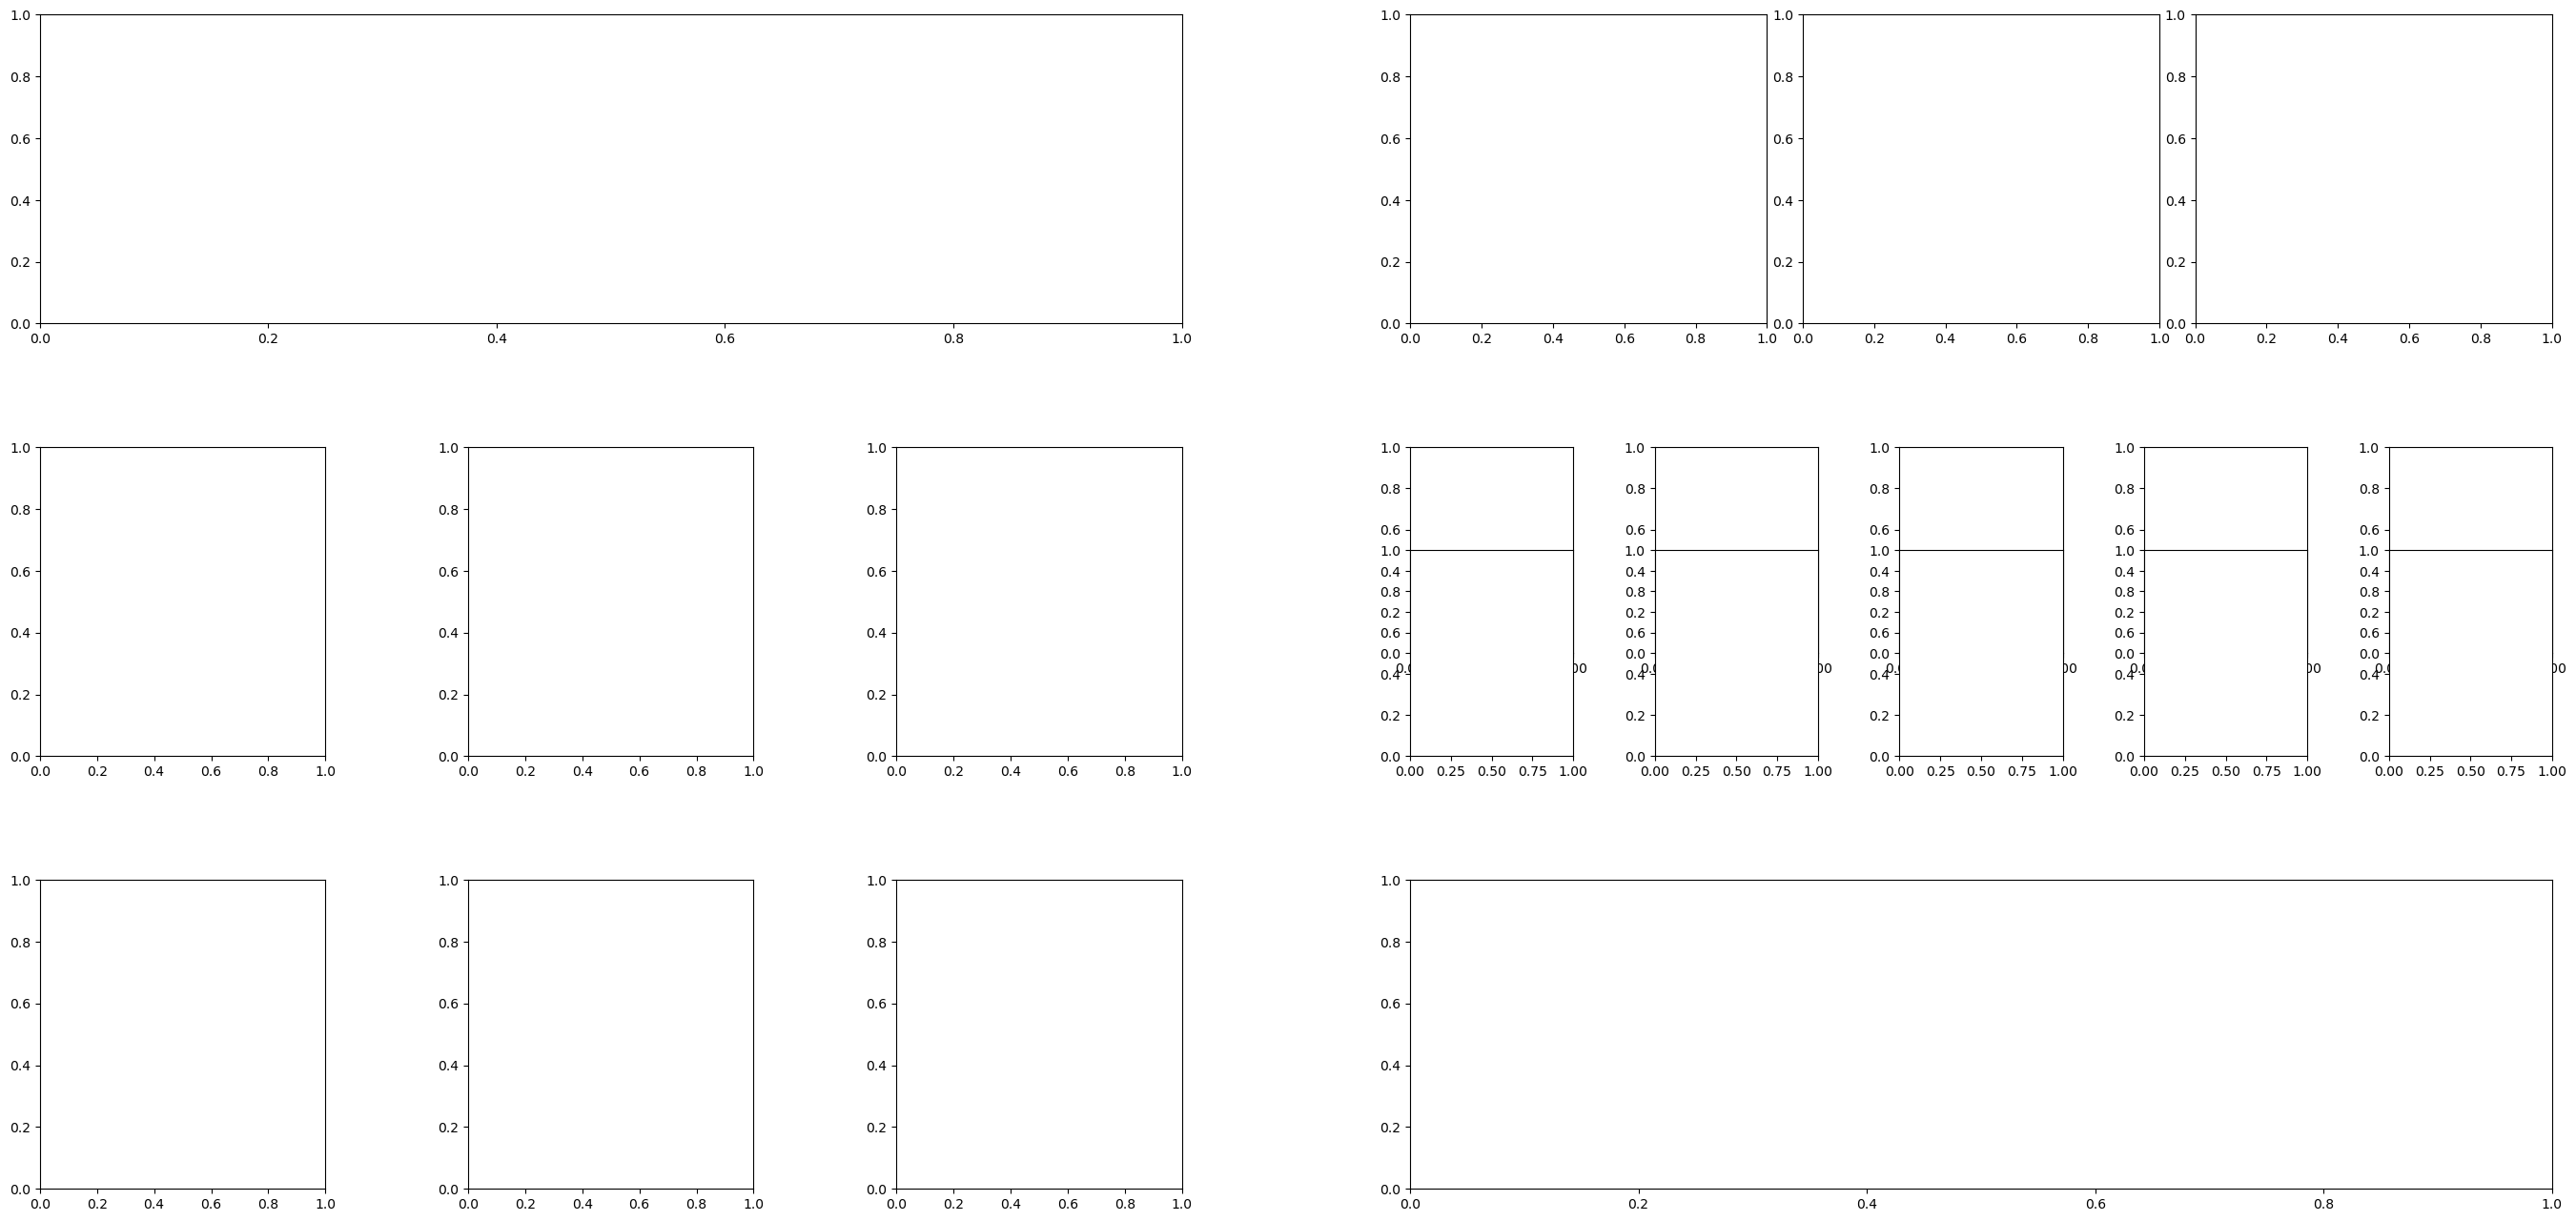

In [42]:

# Set up figure 

fig = plt.figure(figsize=(34, 16))

gs0 = gridspec.GridSpec(1, 2, figure=fig, wspace=0.2)

# Left panel
horizontal_space = 0.4
gs00 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[0], hspace=horizontal_space)

# Percentages
gs000 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs00[0])
ax1A = fig.add_subplot(gs000[0])

# Model iterates
gs001 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs00[1], wspace=.5)
ax1B = [fig.add_subplot(gs001[i]) for i in range(3)]

# C-C heatmap
gs002 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs00[2], wspace=.5)
ax1C = [fig.add_subplot(gs002[i]) for i in range(3)]

# Right panel

gs01 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[1], hspace=horizontal_space)

# PH barcodes
gs010 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs01[0], wspace=.1)
ax2A = [fig.add_subplot(gs010[i]) for i in range(3)]

# ZZ construction
gs011 = gridspec.GridSpecFromSubplotSpec(2, 5, subplot_spec=gs01[1], hspace=-0.5, wspace=.5)
ax2B = [[fig.add_subplot(gs011[i, j]) for j in range(5)] for i in range(2)]

# ZZ landscape
gs012 = gridspec.GridSpecFromSubplotSpec(1, 5, subplot_spec=gs01[2])
ax2C = fig.add_subplot(gs012[:])

# Parameters
heading_text_params = {'fontweight': 'bold', 'fontsize': 24}
title_text_params = {'fontweight': 'bold', 'fontsize': 22}
subtitle_text_params = {'fontsize': 20}

fig

## A. Temporal evolution

<ipython-input-43-61c402cabcf6>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1A.set_xticklabels([0, 20, 40, 60, 80, 100], fontdict=subtitle_text_params)
<ipython-input-43-61c402cabcf6>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1A.set_yticklabels(ax1A.get_yticklabels(), fontdict=subtitle_text_params)


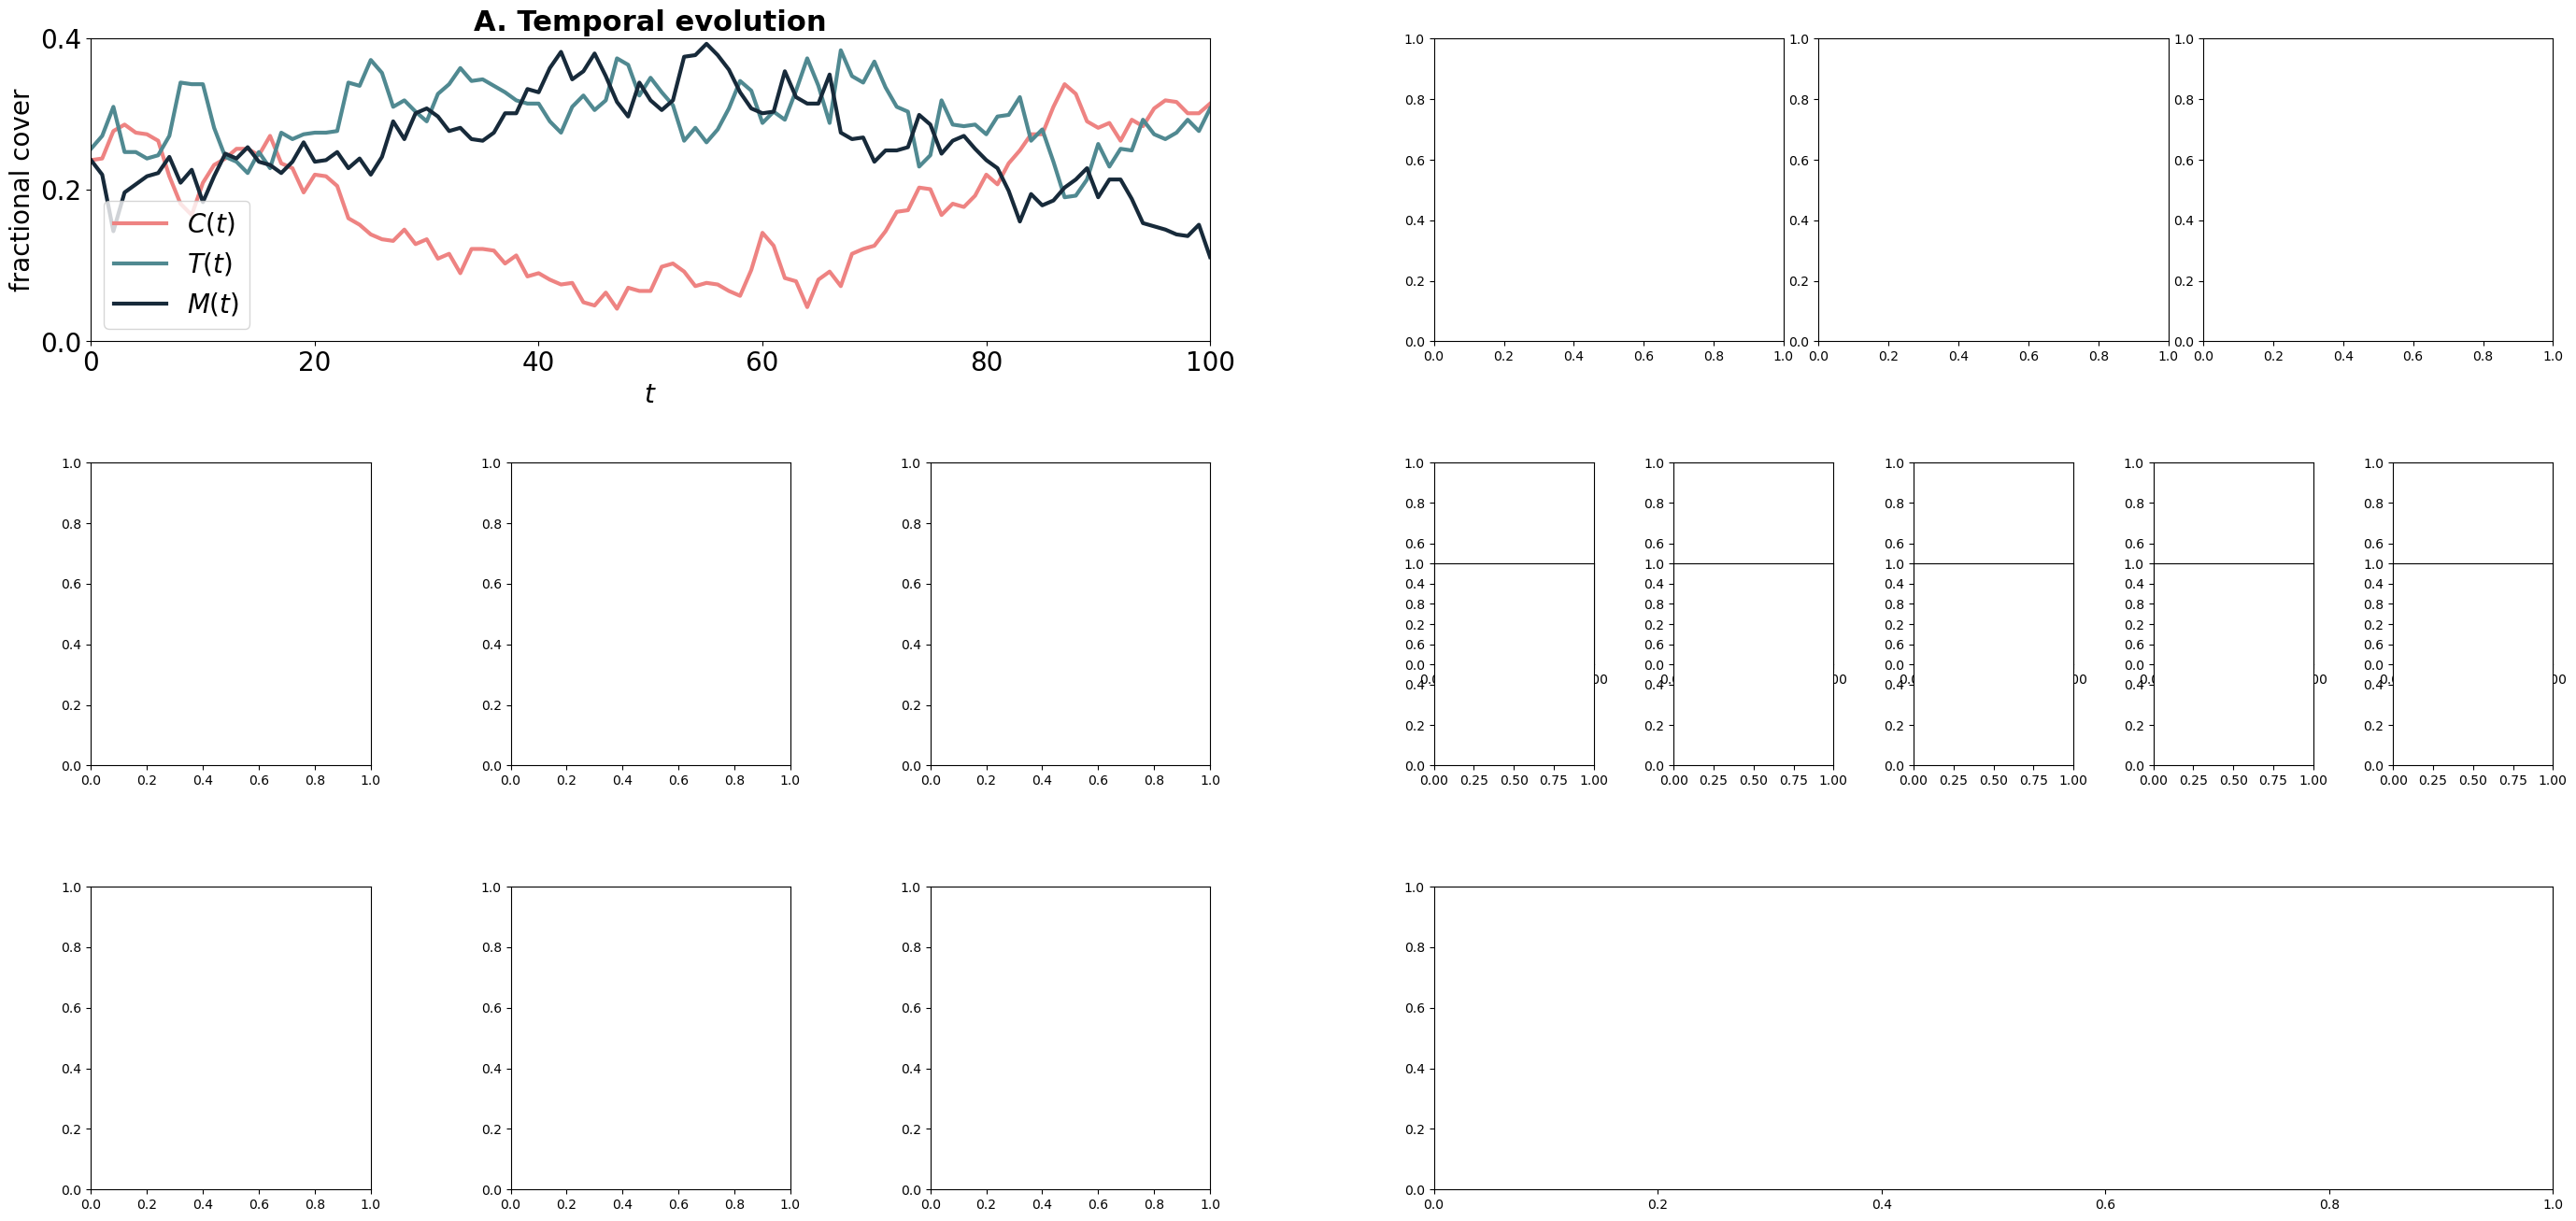

In [43]:
df = pd.read_csv(
    './output/25x25/grid0/grazing57/threshold145/coral33-macro33-r10-d40-a20-y75-time1010-rec10-nsim100.csv')
df['C'] = df.coral_count / (25 ** 2)
df['T'] = df.turf_count / (25 ** 2)
df['M'] = df.macroalgae_count / (25 ** 2)
df['time'] = df.timestep * .1

simulation = 6
colors = ['#EE8382', '#508991', '#172A3A']

time_final = 100
columns = ['C', 'T', 'M']
data = df[(df['simulation'] == simulation) & (df['time'] <= time_final)].set_index('time')[columns]

labels = ['$C(t)$', '$T(t)$', '$M(t)$']
for i, col in enumerate(columns):
    ax1A.plot(data[columns[i]], color=colors[i], label=labels[i], linewidth=3)

ax1A.set_title('A. Temporal evolution', fontdict=title_text_params)
ax1A.set_xlabel("$t$", fontsize=subtitle_text_params['fontsize'])
ax1A.set_ylabel('fractional cover', fontsize=subtitle_text_params['fontsize'])
ax1A.set_ylim([.15, .45])
ax1A.set_xlim([0, 100])
ax1A.yaxis.set_major_locator(MaxNLocator(3))
ax1A.xaxis.set_major_locator(MaxNLocator(5))

ax1A.set_xticklabels([0, 20, 40, 60, 80, 100], fontdict=subtitle_text_params)
ax1A.set_yticklabels(ax1A.get_yticklabels(), fontdict=subtitle_text_params)

ax1A.legend(loc='lower left', fontsize=subtitle_text_params['fontsize'])
ax1A.set_xlim(0, 100)
fig

# B. Spatial evolution

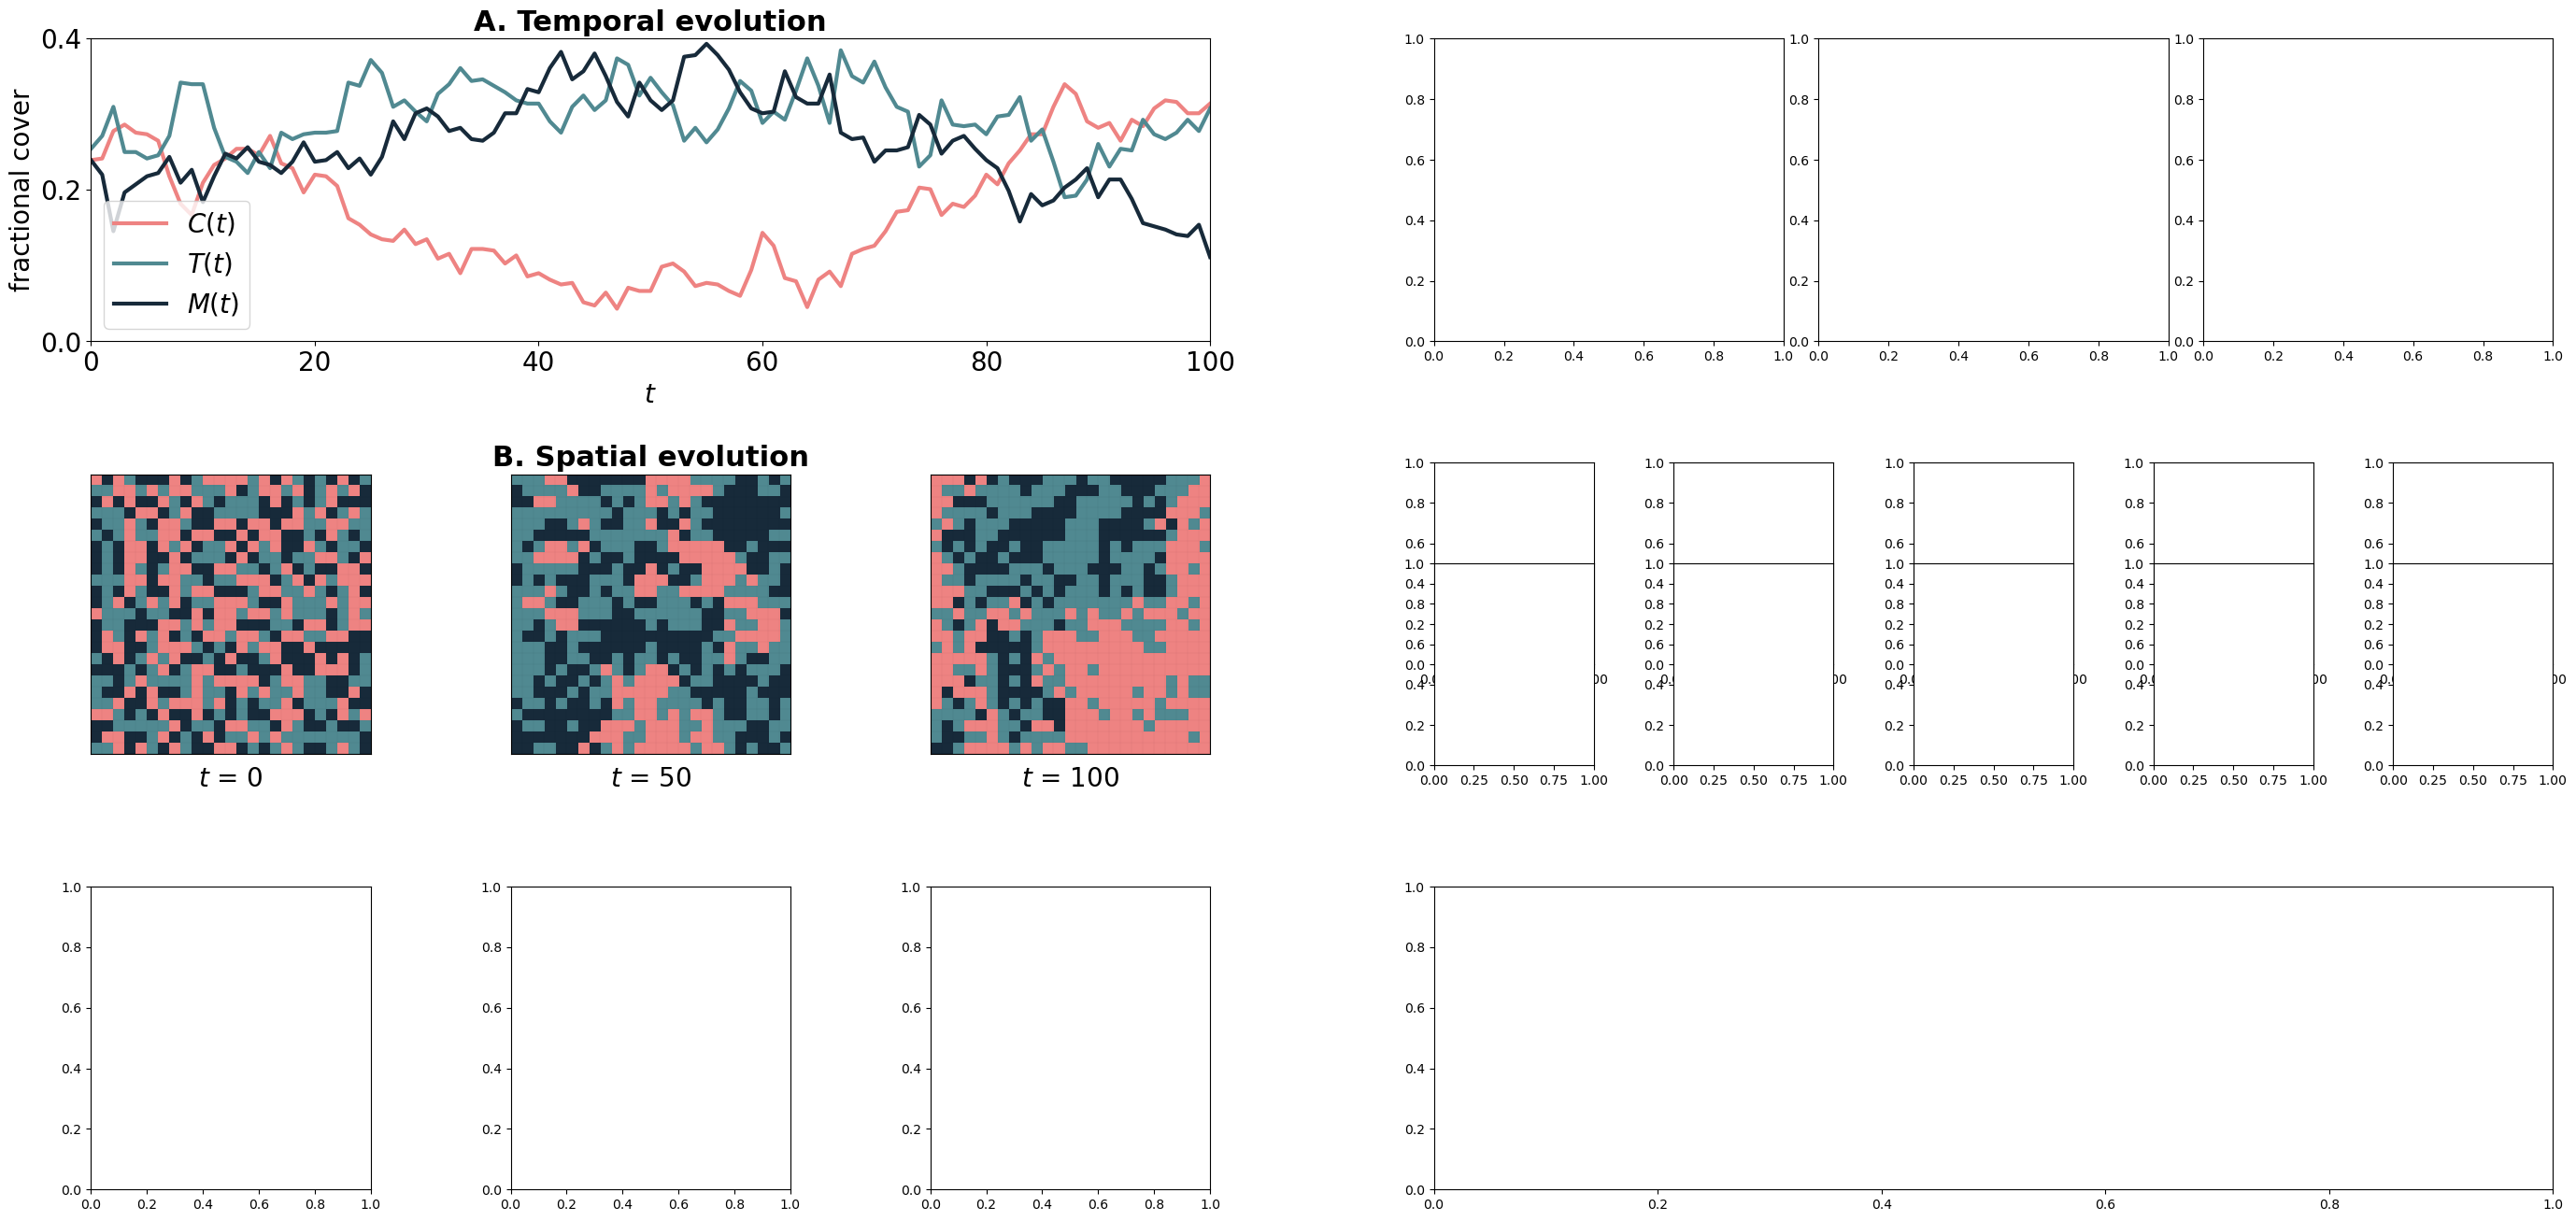

In [44]:
df_images = df[df.simulation == 6]
times = [0, 50, 100]

for index, t in enumerate(times):
    image = np.genfromtxt(
        [df_images[df_images.timestep == t * 10]['image'].values[0].replace('[', '').replace(']', '')])
    image = np.reshape(image, (25, 25))
    ax1B[index] = plot_coral_image(ax1B[index], image)
    ax1B[index].set_xlabel(r'$t$ = ' + str(int(times[index])), fontsize=subtitle_text_params['fontsize'])

ax1B[1].set_title('B. Spatial evolution', fontdict=title_text_params)
fig


## C. Coral Coral Neighbors

<ipython-input-45-f1a28e292eeb>:13: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Spectral_r"))
  cmap.set_bad('gray', 1.)


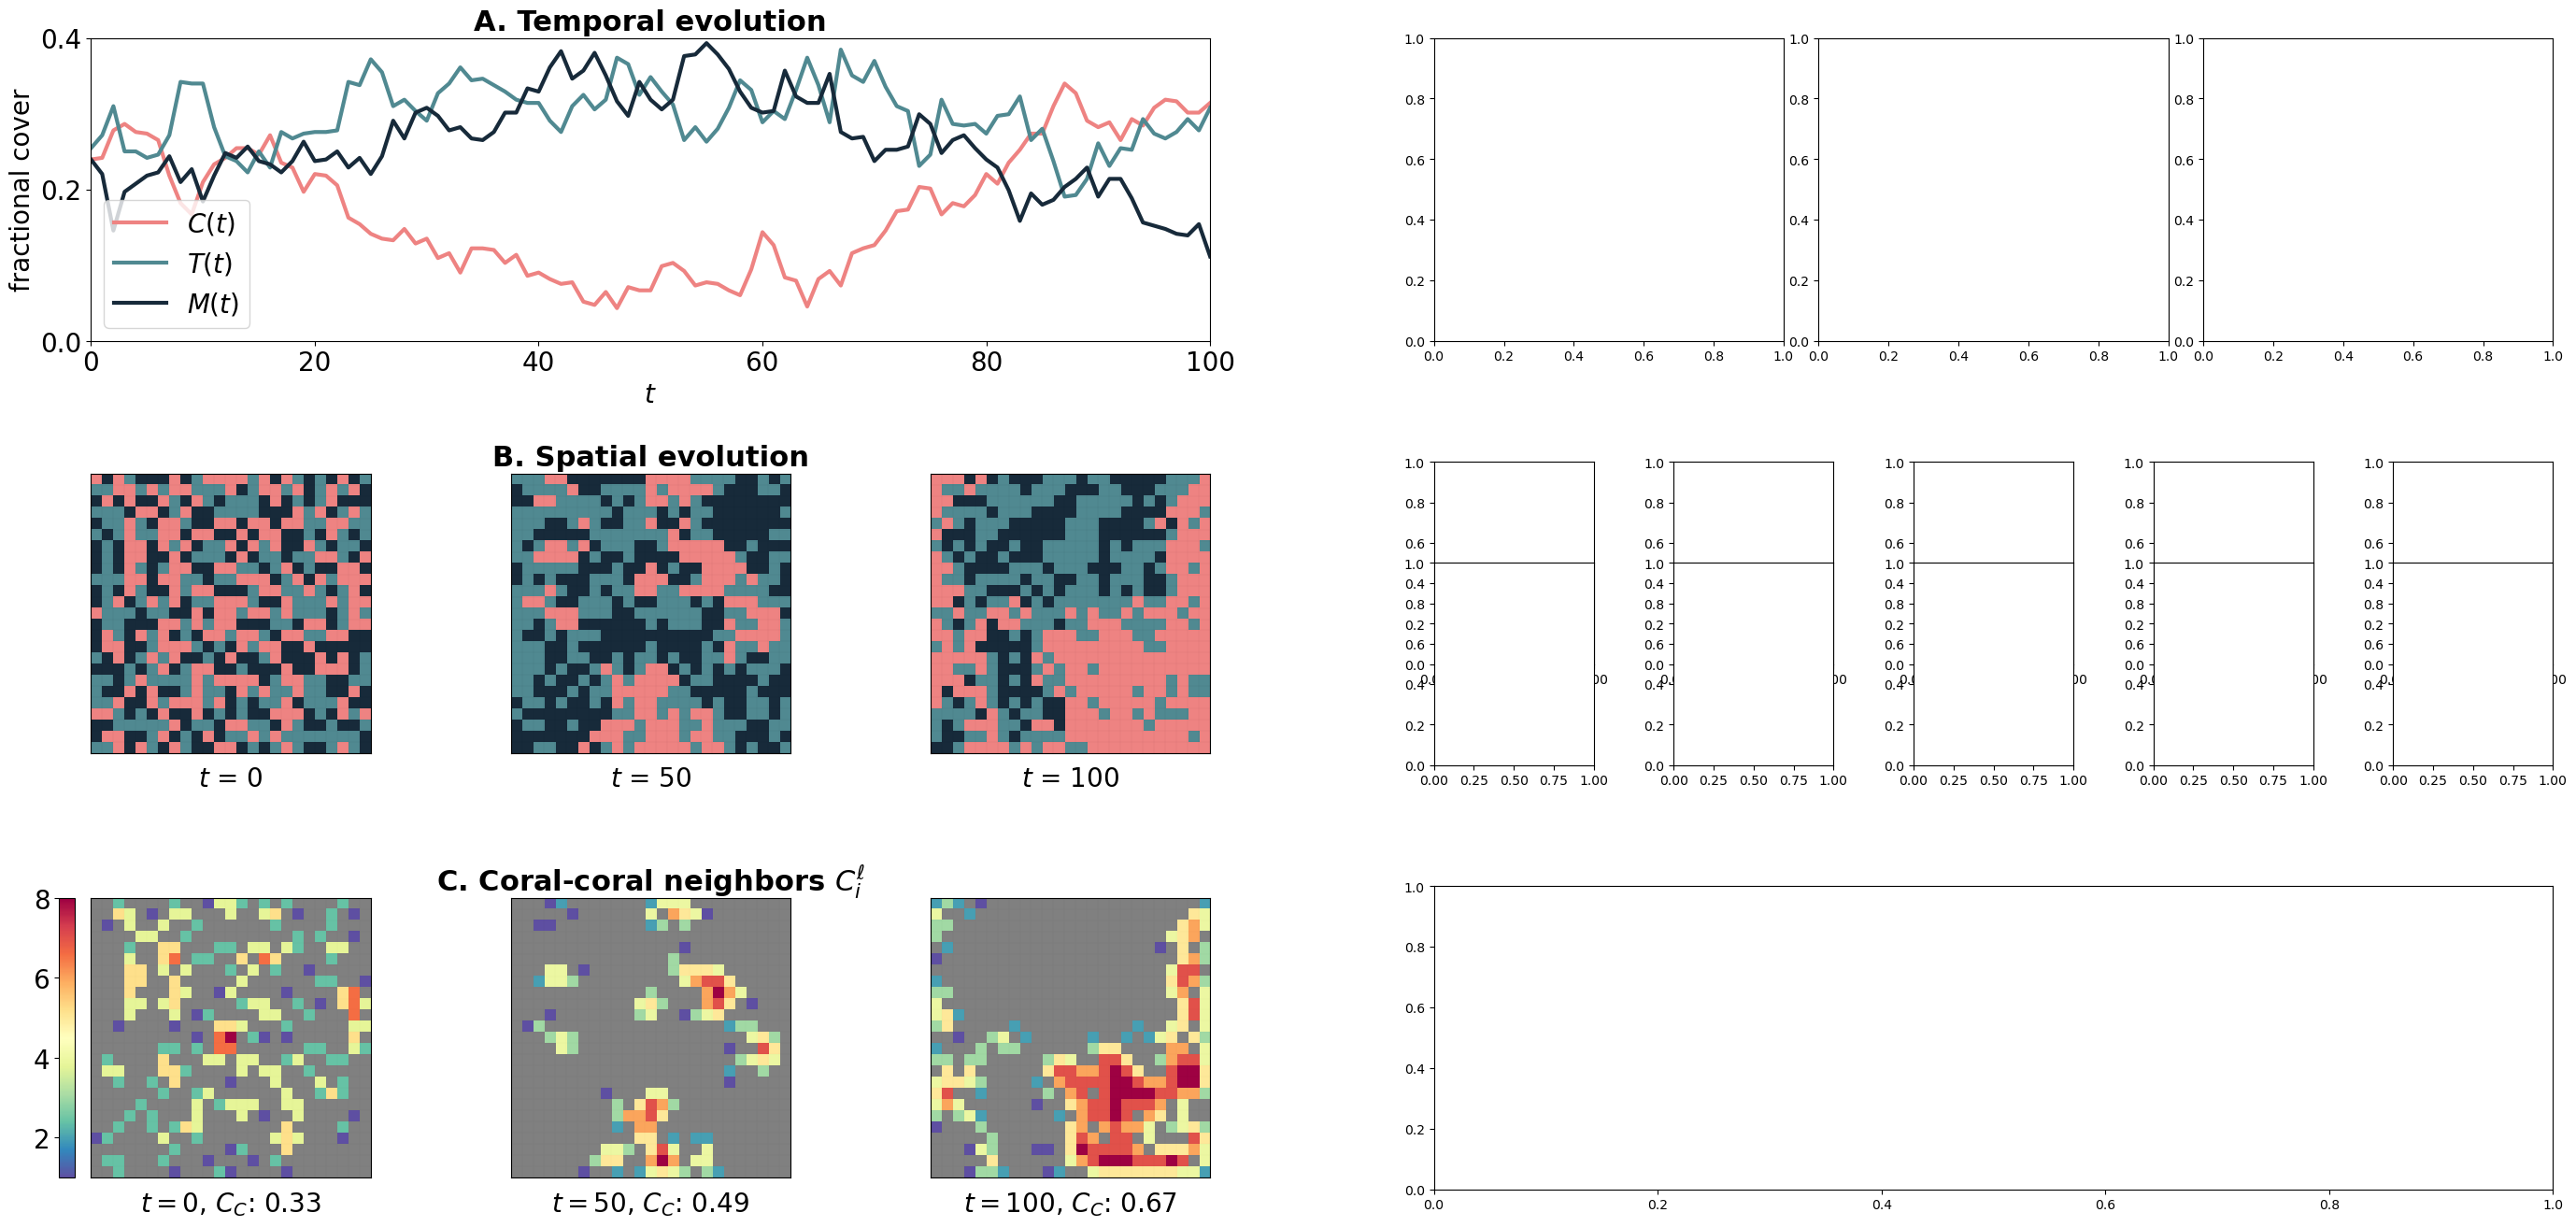

In [45]:
cmap = plt.cm.get_cmap('Spectral_r')

for index, t in enumerate([0, 50, 100]):

    image = np.genfromtxt(
        [df_images[df_images.timestep == t * 10]['image'].values[0].replace('[', '').replace(']', '')])
    image = np.reshape(image, (25, 25))

    densities = TDAtl.binary_to_profile(TDAtl.coral_to_bool(image, 0, 0, 1, 99))

    densities[densities == 0] = np.nan

    cmap.set_bad('gray', 1.)
    if index == 2:
        fig_legend = ax1C[index].imshow(densities, cmap=cmap)
    else:
        ax1C[index].imshow(densities, cmap=cmap)

    neighborhood_descriptors = eval(
        (df[(df['timestep'] == t * 10) & (df['simulation'] == simulation)]['coral_neighbors'].values[0]).replace(' ',
                                                                                                                 ','))
    ax1C[index].set_xlabel('$t=$' + str(index * 50) + ', $C_C$: ' +
                           str(round(neighborhood_descriptors[0], 2)),
                           fontdict=subtitle_text_params)

    ax1C[index].set_yticks([])
    ax1C[index].set_xticks([])
    ax1C[index].set_xticks(np.arange(-.5, 25, 1), minor=True)
    ax1C[index].set_yticks(np.arange(-.5, 25, 1), minor=True)
    ax1C[index].grid(color='black', alpha=0.1, linestyle='-', linewidth=.1, which='minor')
    ax1C[index].tick_params(which='minor', top=[], left=[], right=[], bottom=[])
    ax1C[index].set_frame_on(True)

ax_location = ax1C[0].get_position()
pad = .01
cb_ax = fig.add_axes([ax_location.xmin - pad, ax_location.ymin, .005, ax_location.height])
plt.colorbar(fig_legend, orientation='vertical', cax=cb_ax)
cb_ax.yaxis.set_ticks_position('left')
cb_ax.tick_params(labelsize=subtitle_text_params['fontsize'])

ax1C[1].set_title('C. Coral-coral neighbors $C_i^\ell$', fontdict=title_text_params)

fig

## D. Persistence barcodes

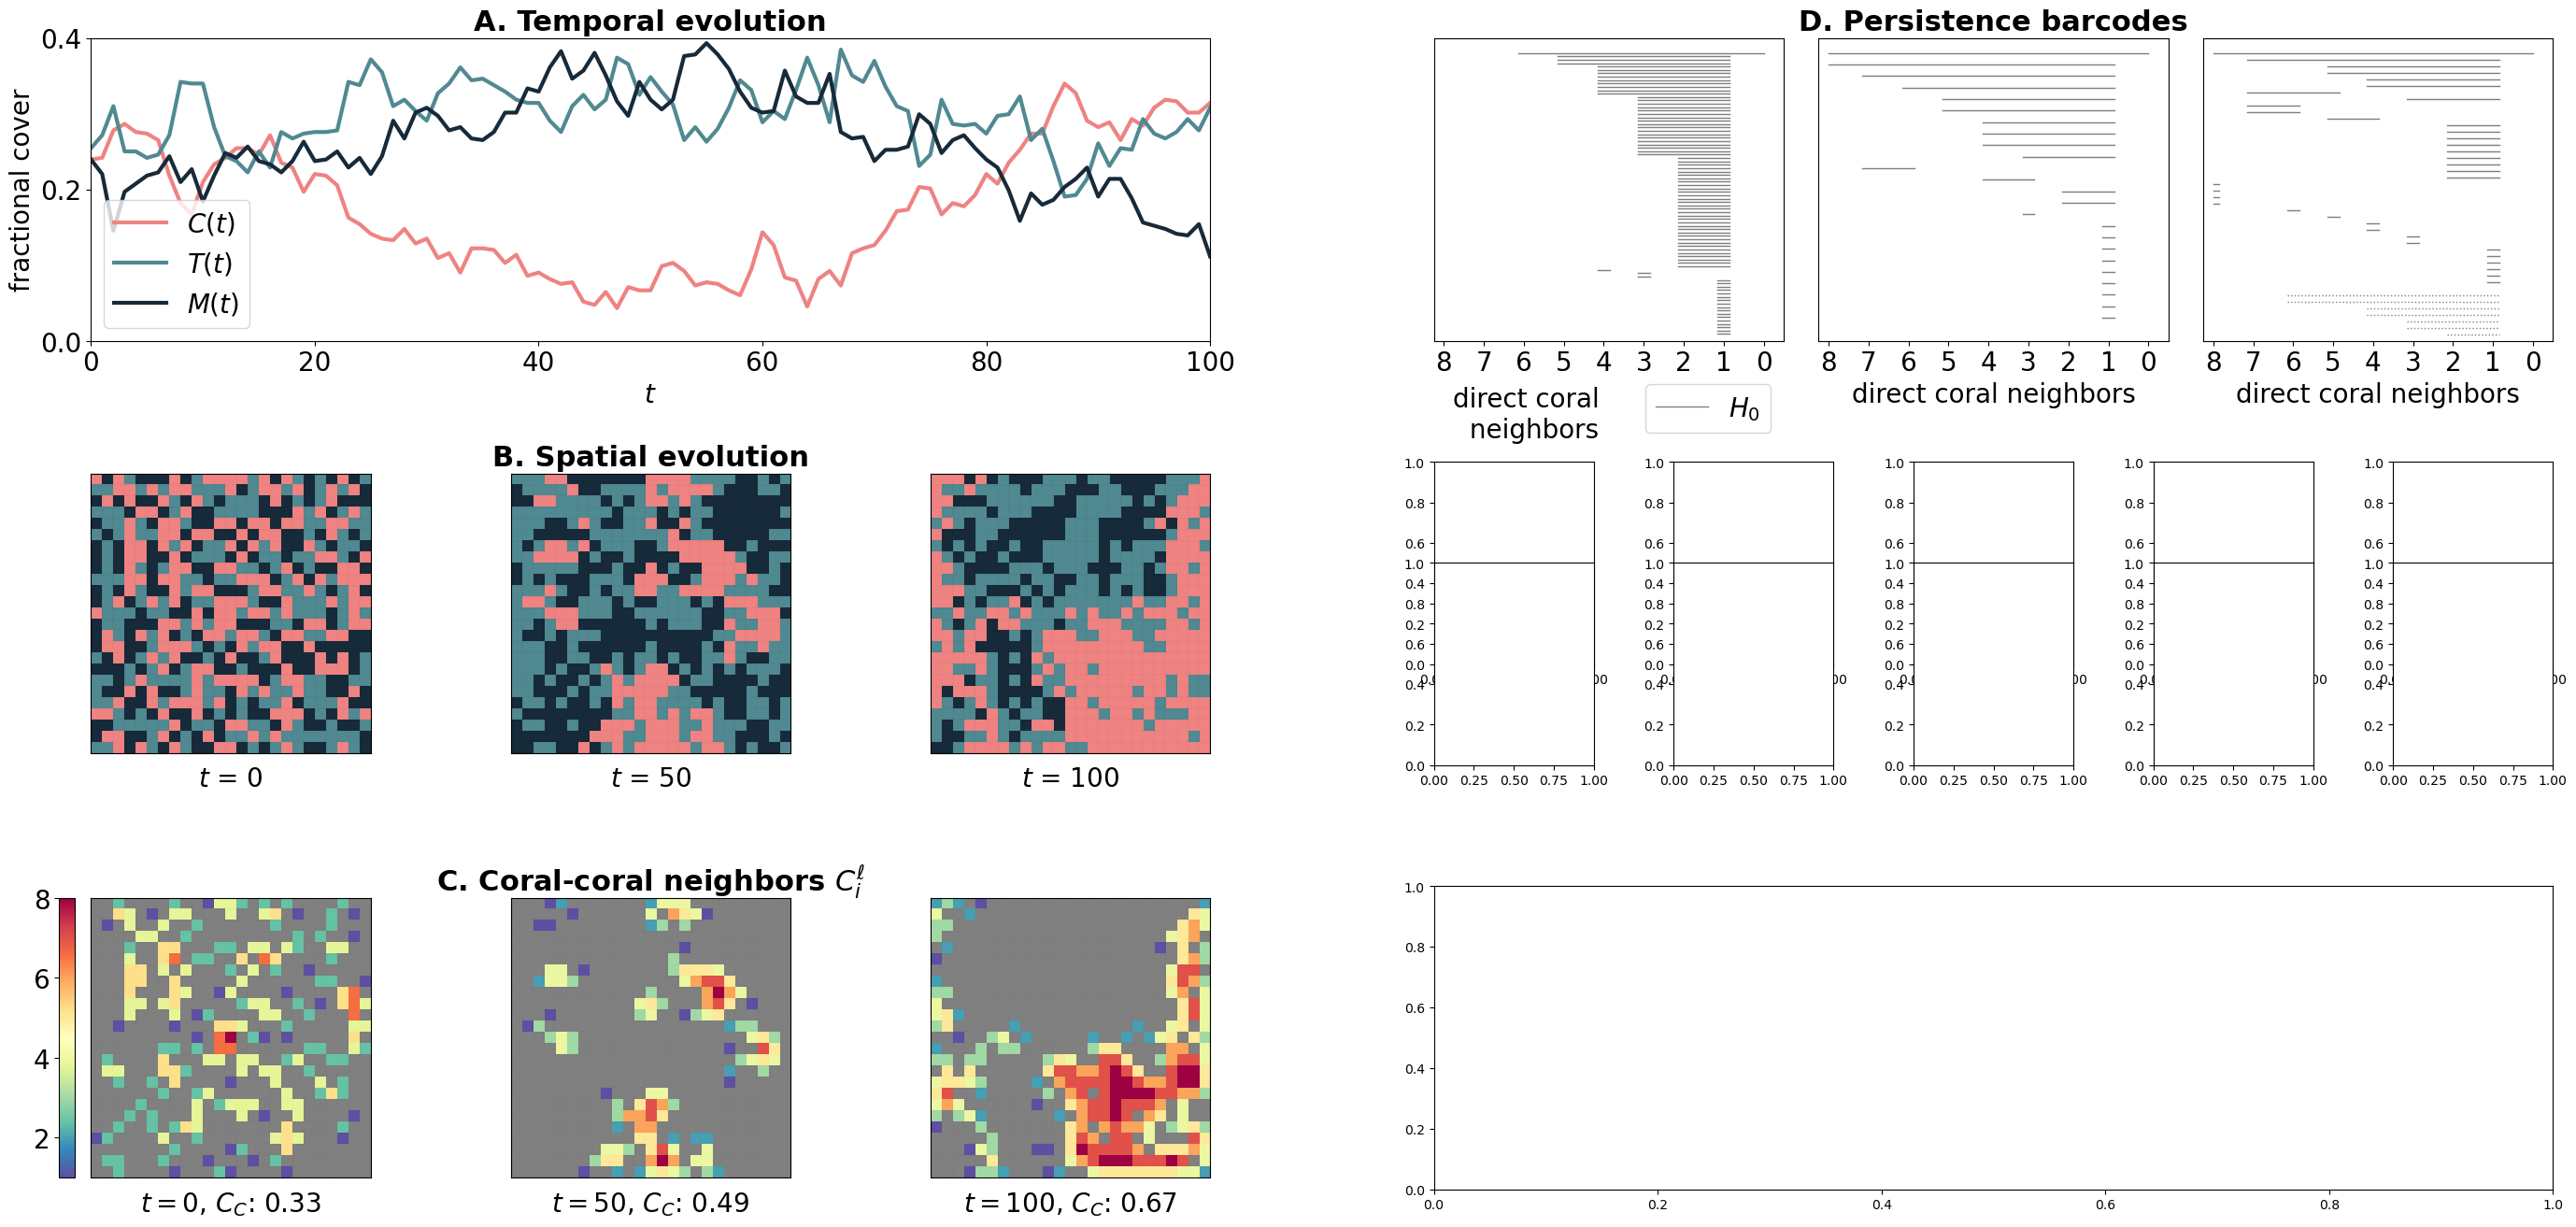

In [46]:
for index, t in enumerate([0, 50, 100]):
    image = np.genfromtxt(
        [df_images[df_images.timestep == t * 10]['image'].values[0].replace('[', '').replace(']', '')])
    image = np.reshape(image, (25, 25))
    ax2A[index] = TDAtl.ph_barcode(ax2A[index], image, group=0, fontdict=subtitle_text_params, show_legend=index == 0, thickness=1)
    ax2A[index].set_xticklabels([8, 7, 6, 5, 4, 3, 2, 1, 0], fontdict=subtitle_text_params)

ax2A[1].set_title('D. Persistence barcodes', fontdict=title_text_params)
fig


## E. Spatio-temporal evolution

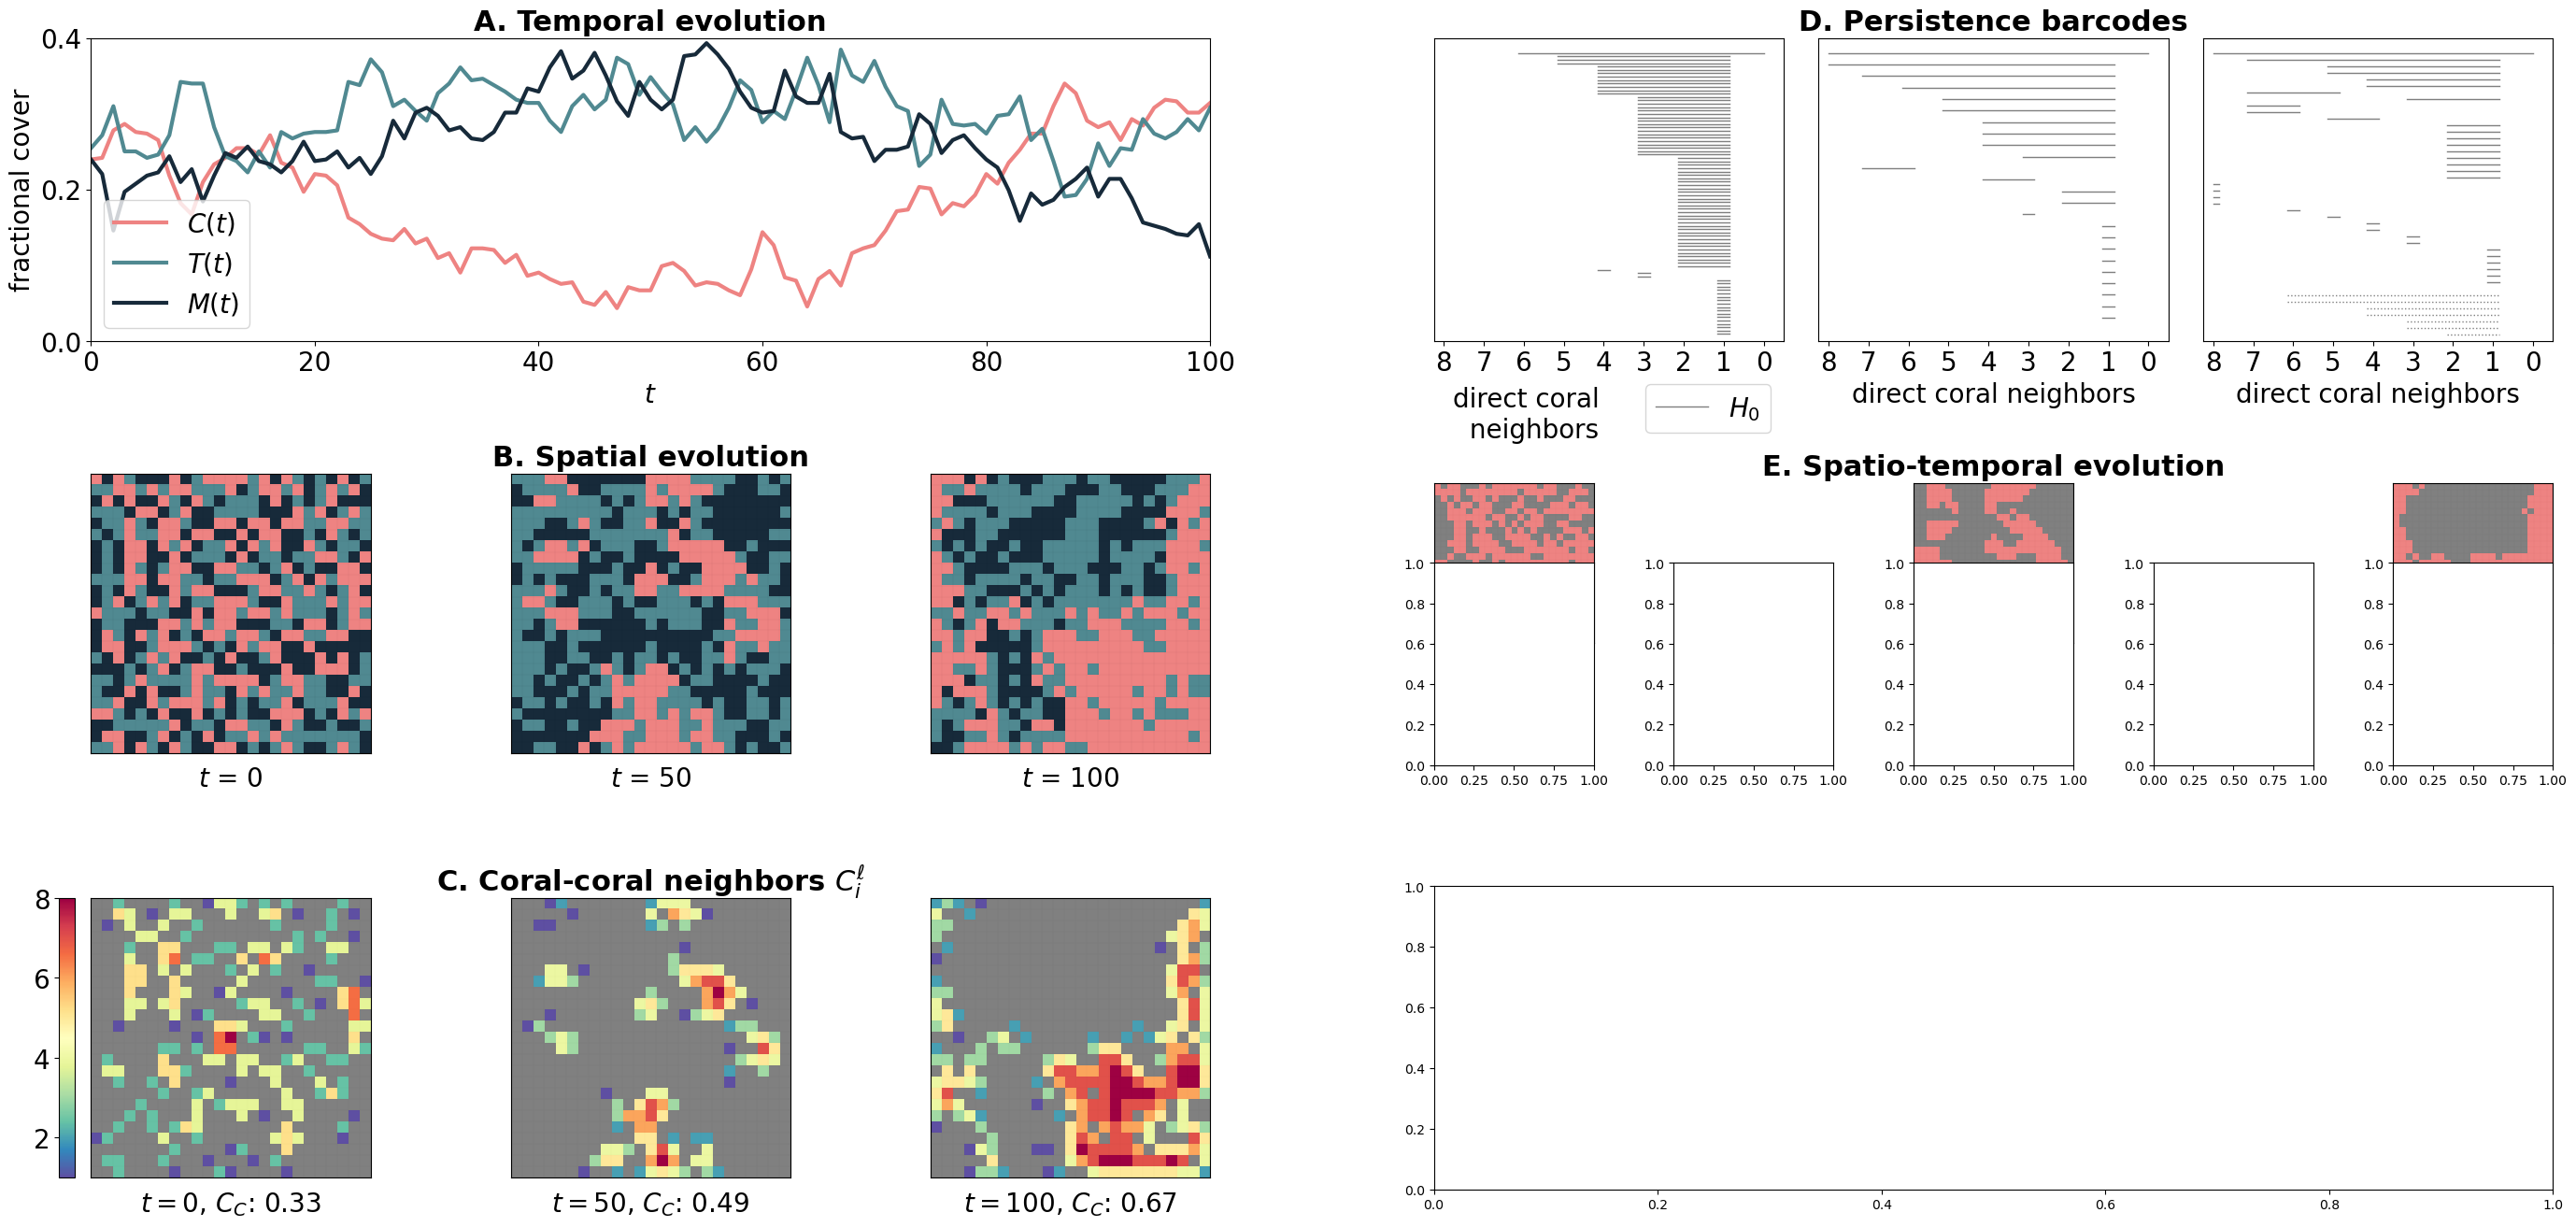

In [47]:
# Top row

colors = ['#808080', '#EE8382']
timesteps = [0, 50, 100]
levels = [0, 1]
cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')

for index in range(5):

    if index in [0, 2, 4]:
        image = np.genfromtxt([df_images[df_images.timestep == 10 * timesteps[int(index / 2)]]['image'].values[
                                   0].replace('[', '').replace(']', '')])
        image = np.reshape(image, (25, 25))

        preprocessed_image = TDAtl.coral_to_bool(image, 0, 1, 1, 99)
        ax2B[0][index].imshow(preprocessed_image, cmap=cmap, norm=norm)
        ax2B[0][index].set_xlabel(r'$t$ = ' + str(int(times[int(index / 2)])), fontdict=subtitle_text_params, zorder=2)
        ax2B[0][index].grid(color='black', alpha=0.1, linestyle='-', linewidth=.1, which='minor')
        ax2B[0][index].set_frame_on(True)

    else:
        ax2B[0][index].set_frame_on(False)

    ax2B[0][index].set_yticks([])
    ax2B[0][index].set_xticks([])
    ax2B[0][index].set_xticks(np.arange(-.5, 25, 1), minor=True)
    ax2B[0][index].set_yticks(np.arange(-.5, 25, 1), minor=True)
    ax2B[0][index].tick_params(which='minor', top=[], left=[], right=[], bottom=[])

ax2B[0][2].set_title('E. Spatio-temporal evolution', fontdict=title_text_params)

fig

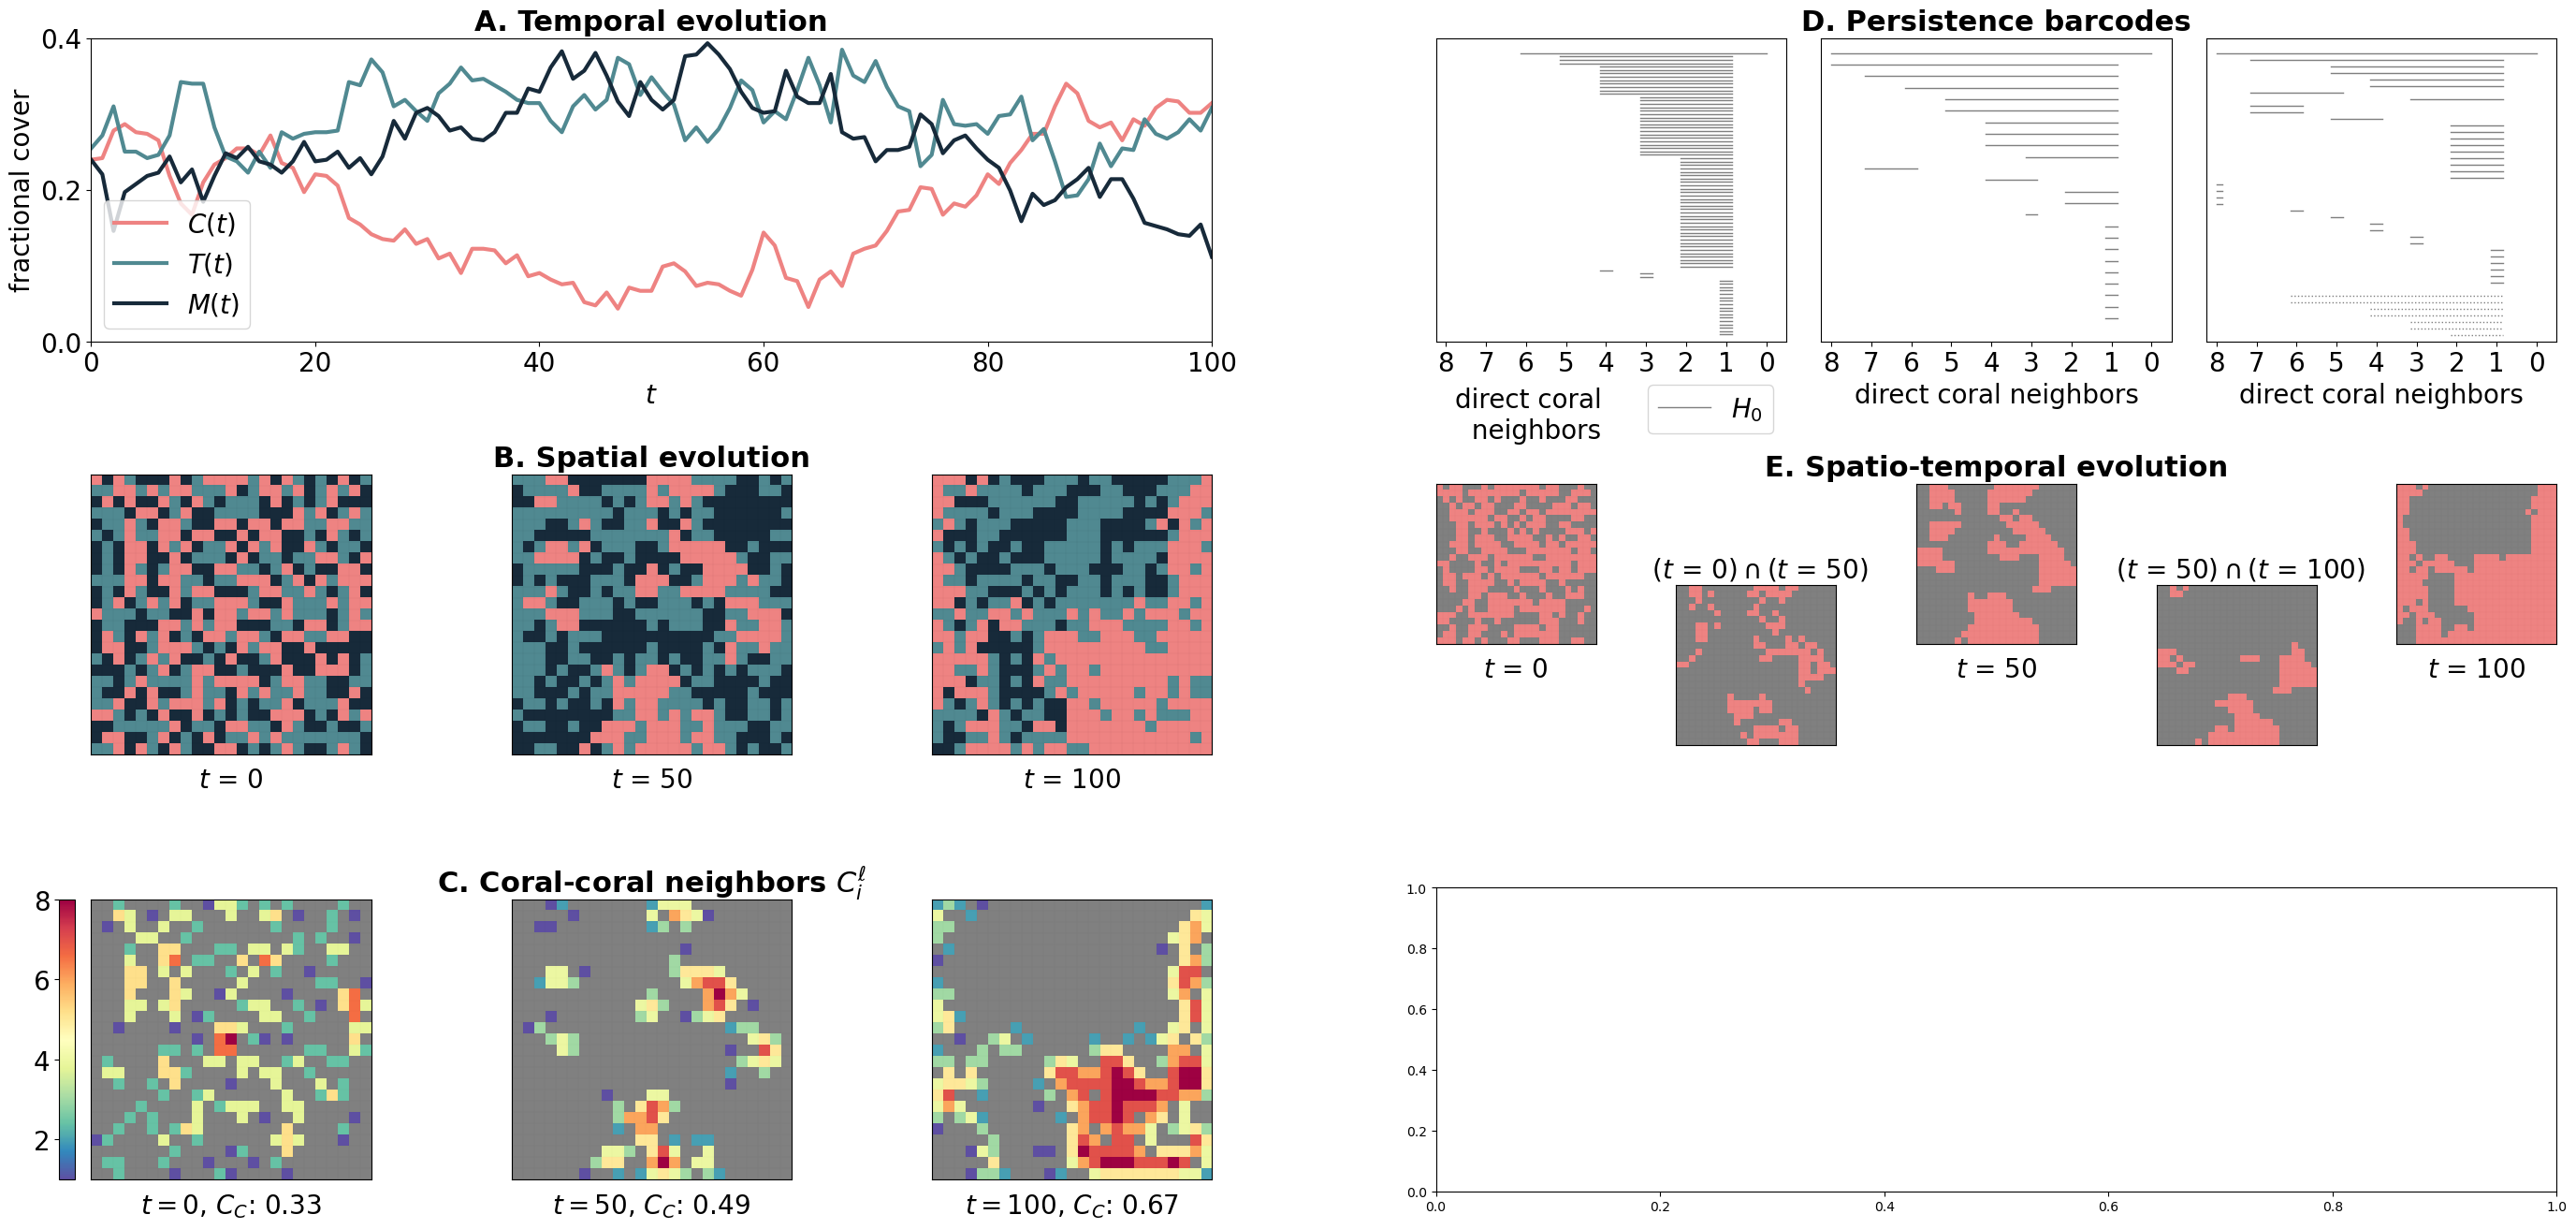

In [48]:
# Bottom row

for index in range(5):

    if index in [1, 3]:

        image_1 = np.genfromtxt([df_images[df_images.timestep == 10 * timesteps[int((index - 1) / 2)]]['image'].values[
                                     0].replace('[', '').replace(']', '')])
        image_1 = np.reshape(image_1, (25, 25))

        image_2 = np.genfromtxt([df_images[df_images.timestep == 10 * timesteps[1 + int((index - 1) / 2)]][
                                     'image'].values[0].replace('[', '').replace(']', '')])
        image_2 = np.reshape(image_2, (25, 25))

        preprocessed_image_1 = TDAtl.coral_to_bool(image_1, 0, 1, 1, 99)
        preprocessed_image_2 = TDAtl.coral_to_bool(image_2, 0, 1, 1, 99)

        image = np.logical_and(preprocessed_image_1, preprocessed_image_2)

        ax2B[1][index].imshow(image, cmap=cmap, norm=norm)
        ax2B[1][index].set_title(r' $(t$ = ' + str(
            int(times[int(round((index - 1) / 2))])) + '$) \cap                            (t$ = ' + str(
            int(times[int(round((index - 1) / 2)) + 1])) + '$)$', fontsize=subtitle_text_params['fontsize'])
        ax2B[1][index].grid(color='black', alpha=0.1, linestyle='-', linewidth=.1, which='minor')
        ax2B[1][index].set_frame_on(True)

    else:
        ax2B[1][index].set_frame_on(False)

    ax2B[1][index].set_yticks([])
    ax2B[1][index].set_xticks([])
    ax2B[1][index].set_xticks(np.arange(-.5, 25, 1), minor=True)
    ax2B[1][index].set_yticks(np.arange(-.5, 25, 1), minor=True)
    ax2B[1][index].tick_params(which='minor', top=[], left=[], right=[], bottom=[])

fig


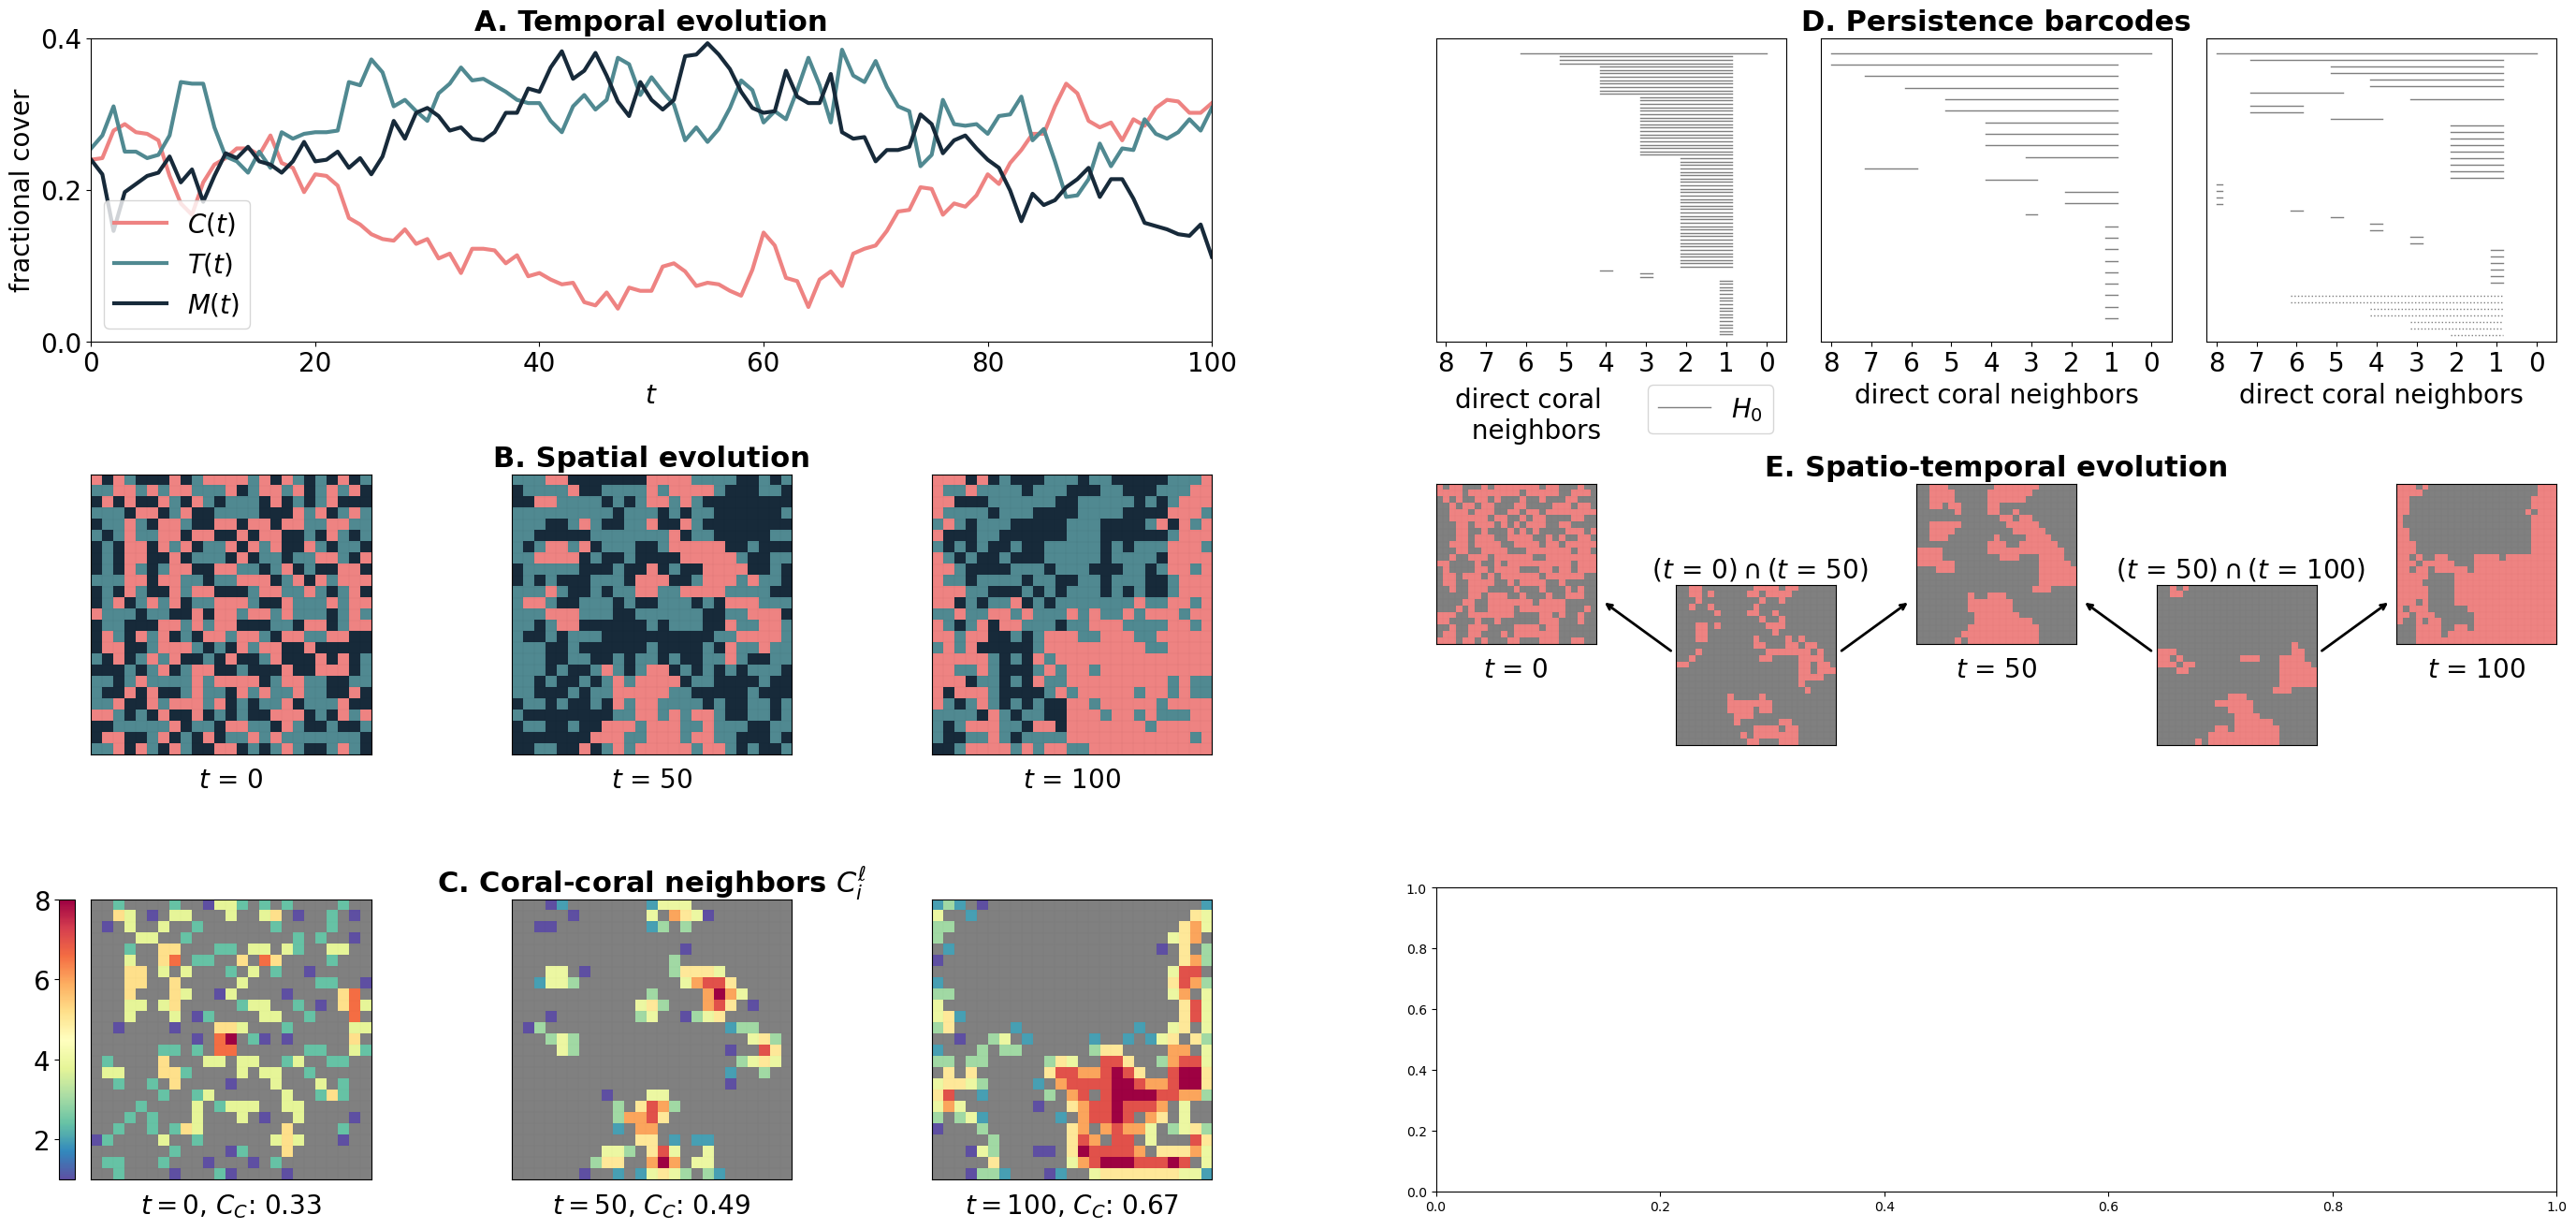

In [49]:
# arrows

ax2B[1][1].annotate('', xy=(-1, 10), xytext=(-12, 2),
                    arrowprops=dict(arrowstyle="<-", color='k', linewidth=2),
                    zorder=2, annotation_clip=False)
ax2B[1][1].annotate('', xy=(25, 10), xytext=(36, 2),
                    arrowprops=dict(arrowstyle="<-", color='k', linewidth=2),
                    zorder=2, annotation_clip=False)
ax2B[1][3].annotate('', xy=(-1, 10), xytext=(-12, 2),
                    arrowprops=dict(arrowstyle="<-", color='k', linewidth=2),
                    zorder=2, annotation_clip=False)
ax2B[1][3].annotate('', xy=(25, 10), xytext=(36, 2),
                    arrowprops=dict(arrowstyle="<-", color='k', linewidth=2),
                    zorder=2, annotation_clip=False)
fig


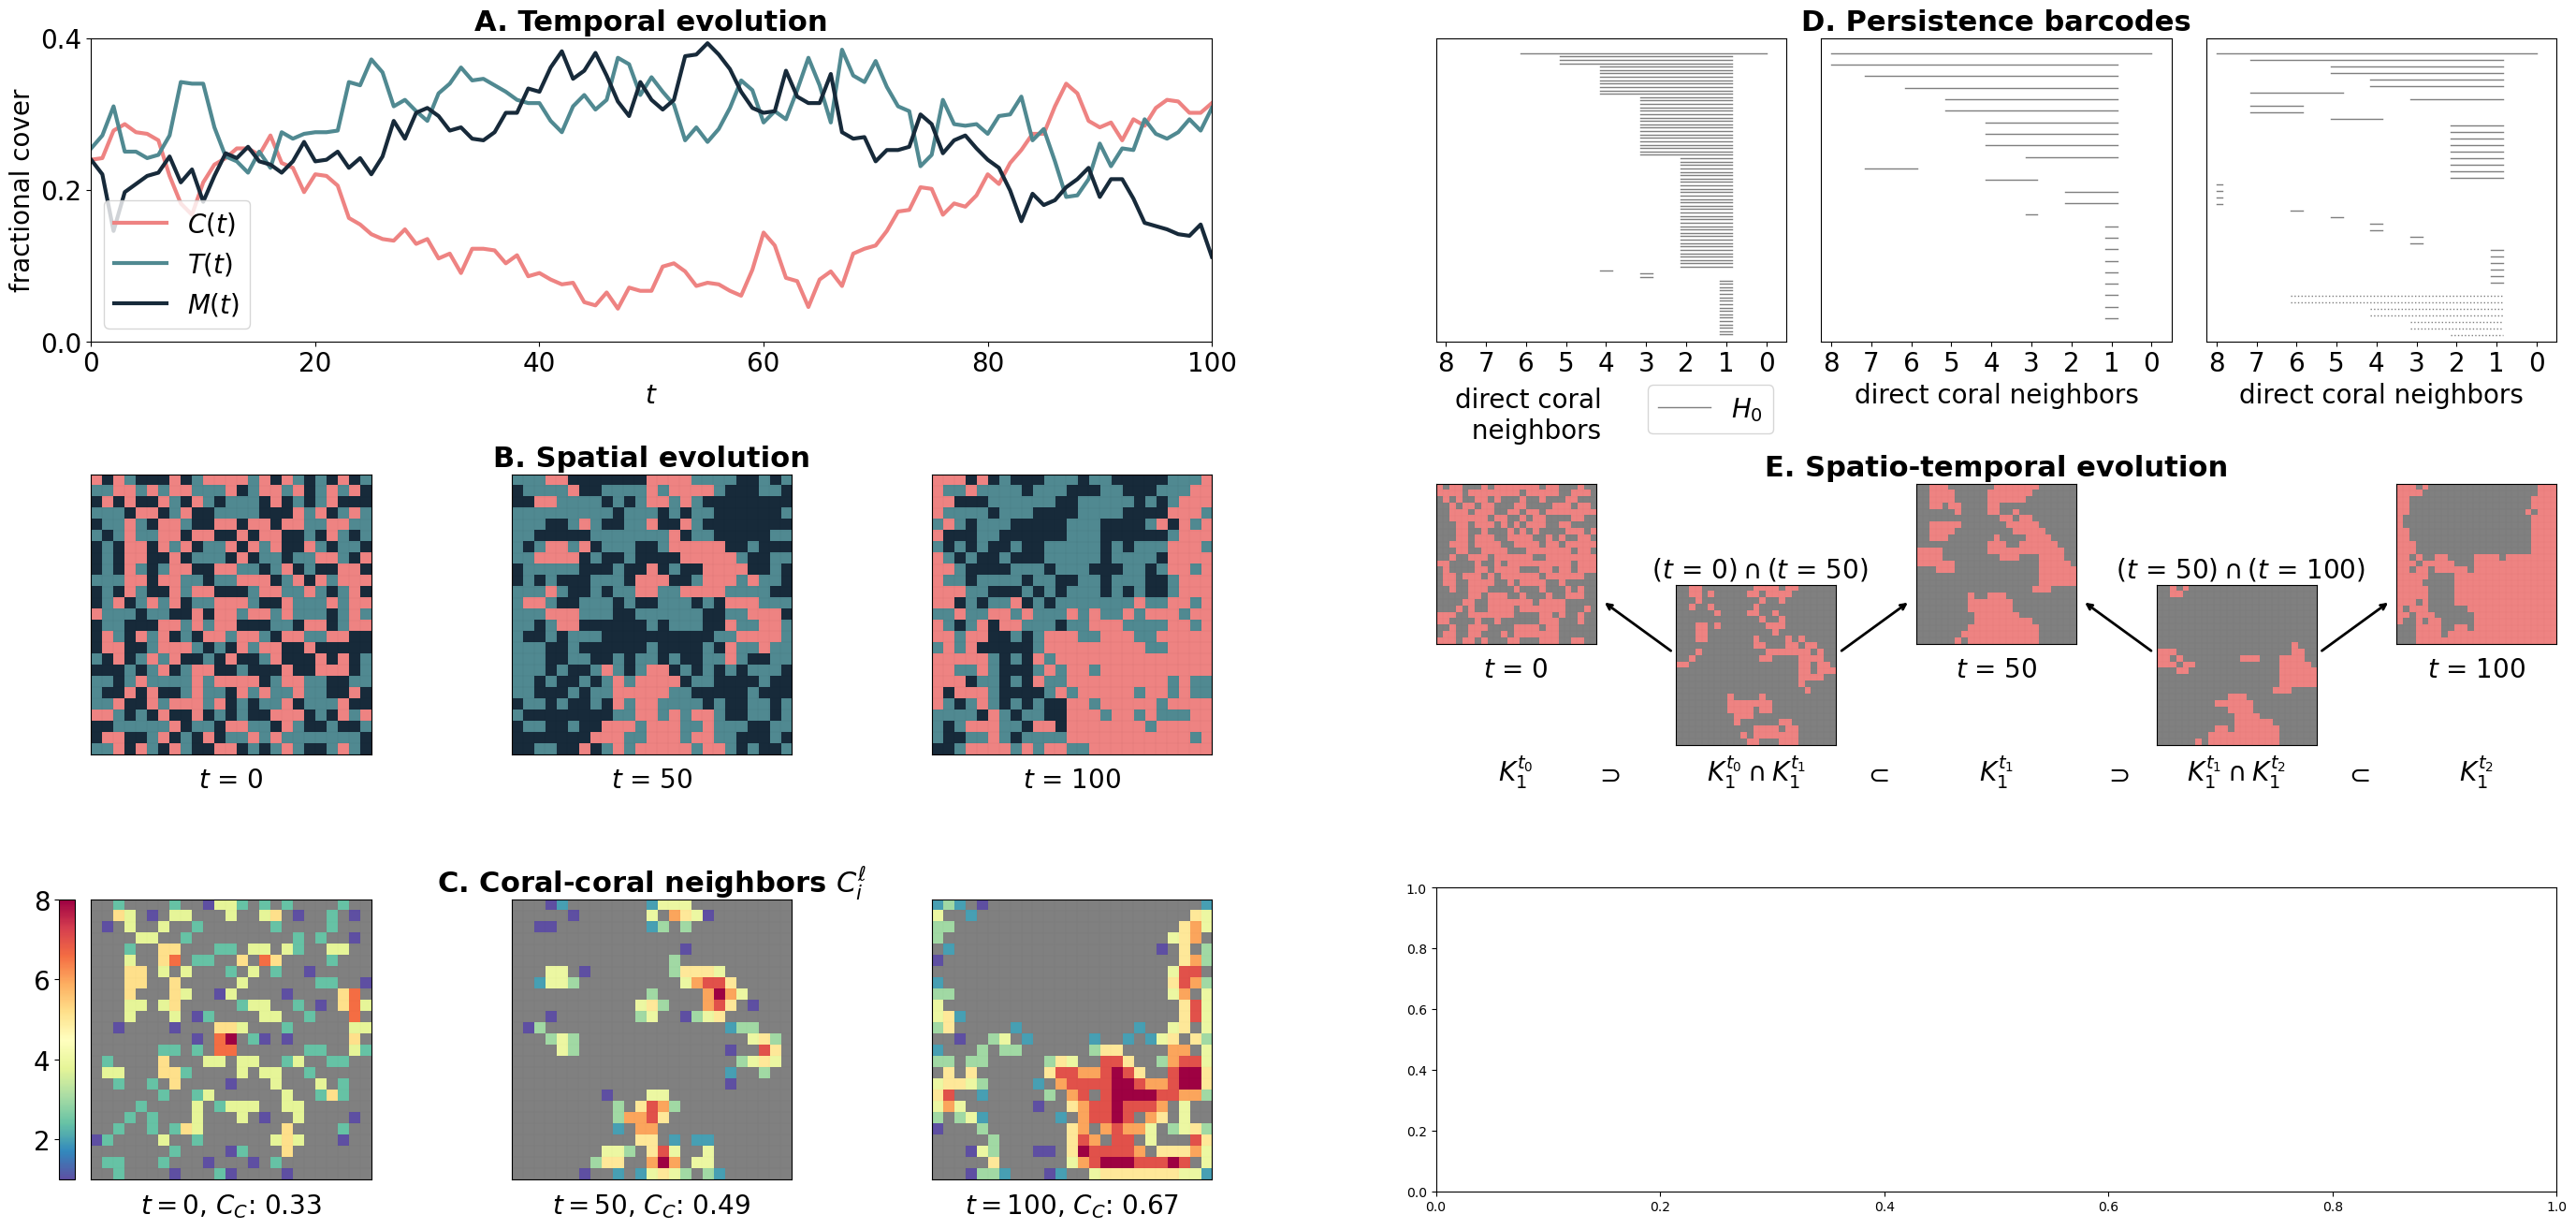

In [50]:
# text

padx = .009
pady = 0.01

p = [ax2B[1][i].get_position() for i in range(5)]
all_text = ['$K_1^{t_0}$', '$\supset$', '$K_1^{t_0} \cap K_1^{t_1}$', '$\subset$',
            '$K_1^{t_1}$', '$\supset$', '$K_1^{t_1} \cap K_1^{t_2}$', '$\subset$', '$K_1^{t_2}$']

text_locations = [[(p[0].xmin + p[0].xmax) / 2, p[0].ymin - pady],
                  [(p[0].xmax + p[1].xmin) / 2 - padx, p[0].ymin - pady],
                  [(p[1].xmin + p[1].xmax) / 2, p[0].ymin - pady],
                  [(p[1].xmax + p[2].xmin) / 2, p[0].ymin - pady],
                  [(p[2].xmin + p[2].xmax) / 2, p[0].ymin - pady],
                  [(p[2].xmax + p[3].xmin) / 2, p[0].ymin - pady],
                  [(p[3].xmin + p[3].xmax) / 2, p[0].ymin - pady],
                  [(p[3].xmax + p[4].xmin) / 2, p[0].ymin - pady],
                  [(p[4].xmin + p[4].xmax) / 2, p[0].ymin - pady]]

for i in range(len(all_text)):
    fig.text(text_locations[i][0], text_locations[i][1],
             all_text[i], ha='center', fontdict=subtitle_text_params)

fig

## F. Persistence landscapes

In [51]:
### Need to run the file PL_grazing.sh first ###

# Set parameters that were used in PL_grazing.sh
tims = 100

filepath = './output/25x25/grid0/grazing57/threshold146'

landscape_colors = ['#370665', '#35589A', '#F14A16', '#FC9918']
labels = ['$\overline{\lambda}_1$', '$\overline{\lambda}_2$', '$\overline{\lambda}_3$']
landscape_path = './output/25x25/grid0/grazing57/threshold145/bars/average.land'
landscape_cps = TDAtl.get_landscape_critical_points(landscape_path)
for i in range(3):
    critical_points = np.array(landscape_cps[i])
    lines = ax2C.plot(critical_points[:, 0], critical_points[:, 1], color=landscape_colors[i % len(landscape_colors)],
                      label=labels[i], linewidth=3)

ax2C.set_xlim([0, 100])
ax2C.set_xlabel('$t$', fontdict=subtitle_text_params)
ax2C.set_ylabel('time-persistence', fontdict=subtitle_text_params)
ax2C.set_ylim([0, 1 + 100 / 2])
ax2C.set_yticklabels(labels=[0, 10, 20, 30, 40, 50], fontdict=subtitle_text_params)
ax2C.set_xticklabels(labels=[0, 20, 40, 60, 80, 100], fontdict=subtitle_text_params)
xleft, xright = ax2C.get_xlim()
ybottom, ytop = ax2C.get_ylim()
ax2C.set_aspect(abs((xright - xleft) / (ybottom - ytop)) * 0.25)
ax2C.legend(loc='upper right', prop={'size': subtitle_text_params['fontsize']})
ax2C.set_title('F. Persistence landscapes', fontdict=title_text_params)


<ipython-input-51-9b0f28e60fe6>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2C.set_yticklabels(labels=[0, 10, 20, 30, 40, 50], fontdict=subtitle_text_params)
<ipython-input-51-9b0f28e60fe6>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2C.set_xticklabels(labels=[0, 20, 40, 60, 80, 100], fontdict=subtitle_text_params)


Text(0.5, 1.0, 'F. Persistence landscapes')

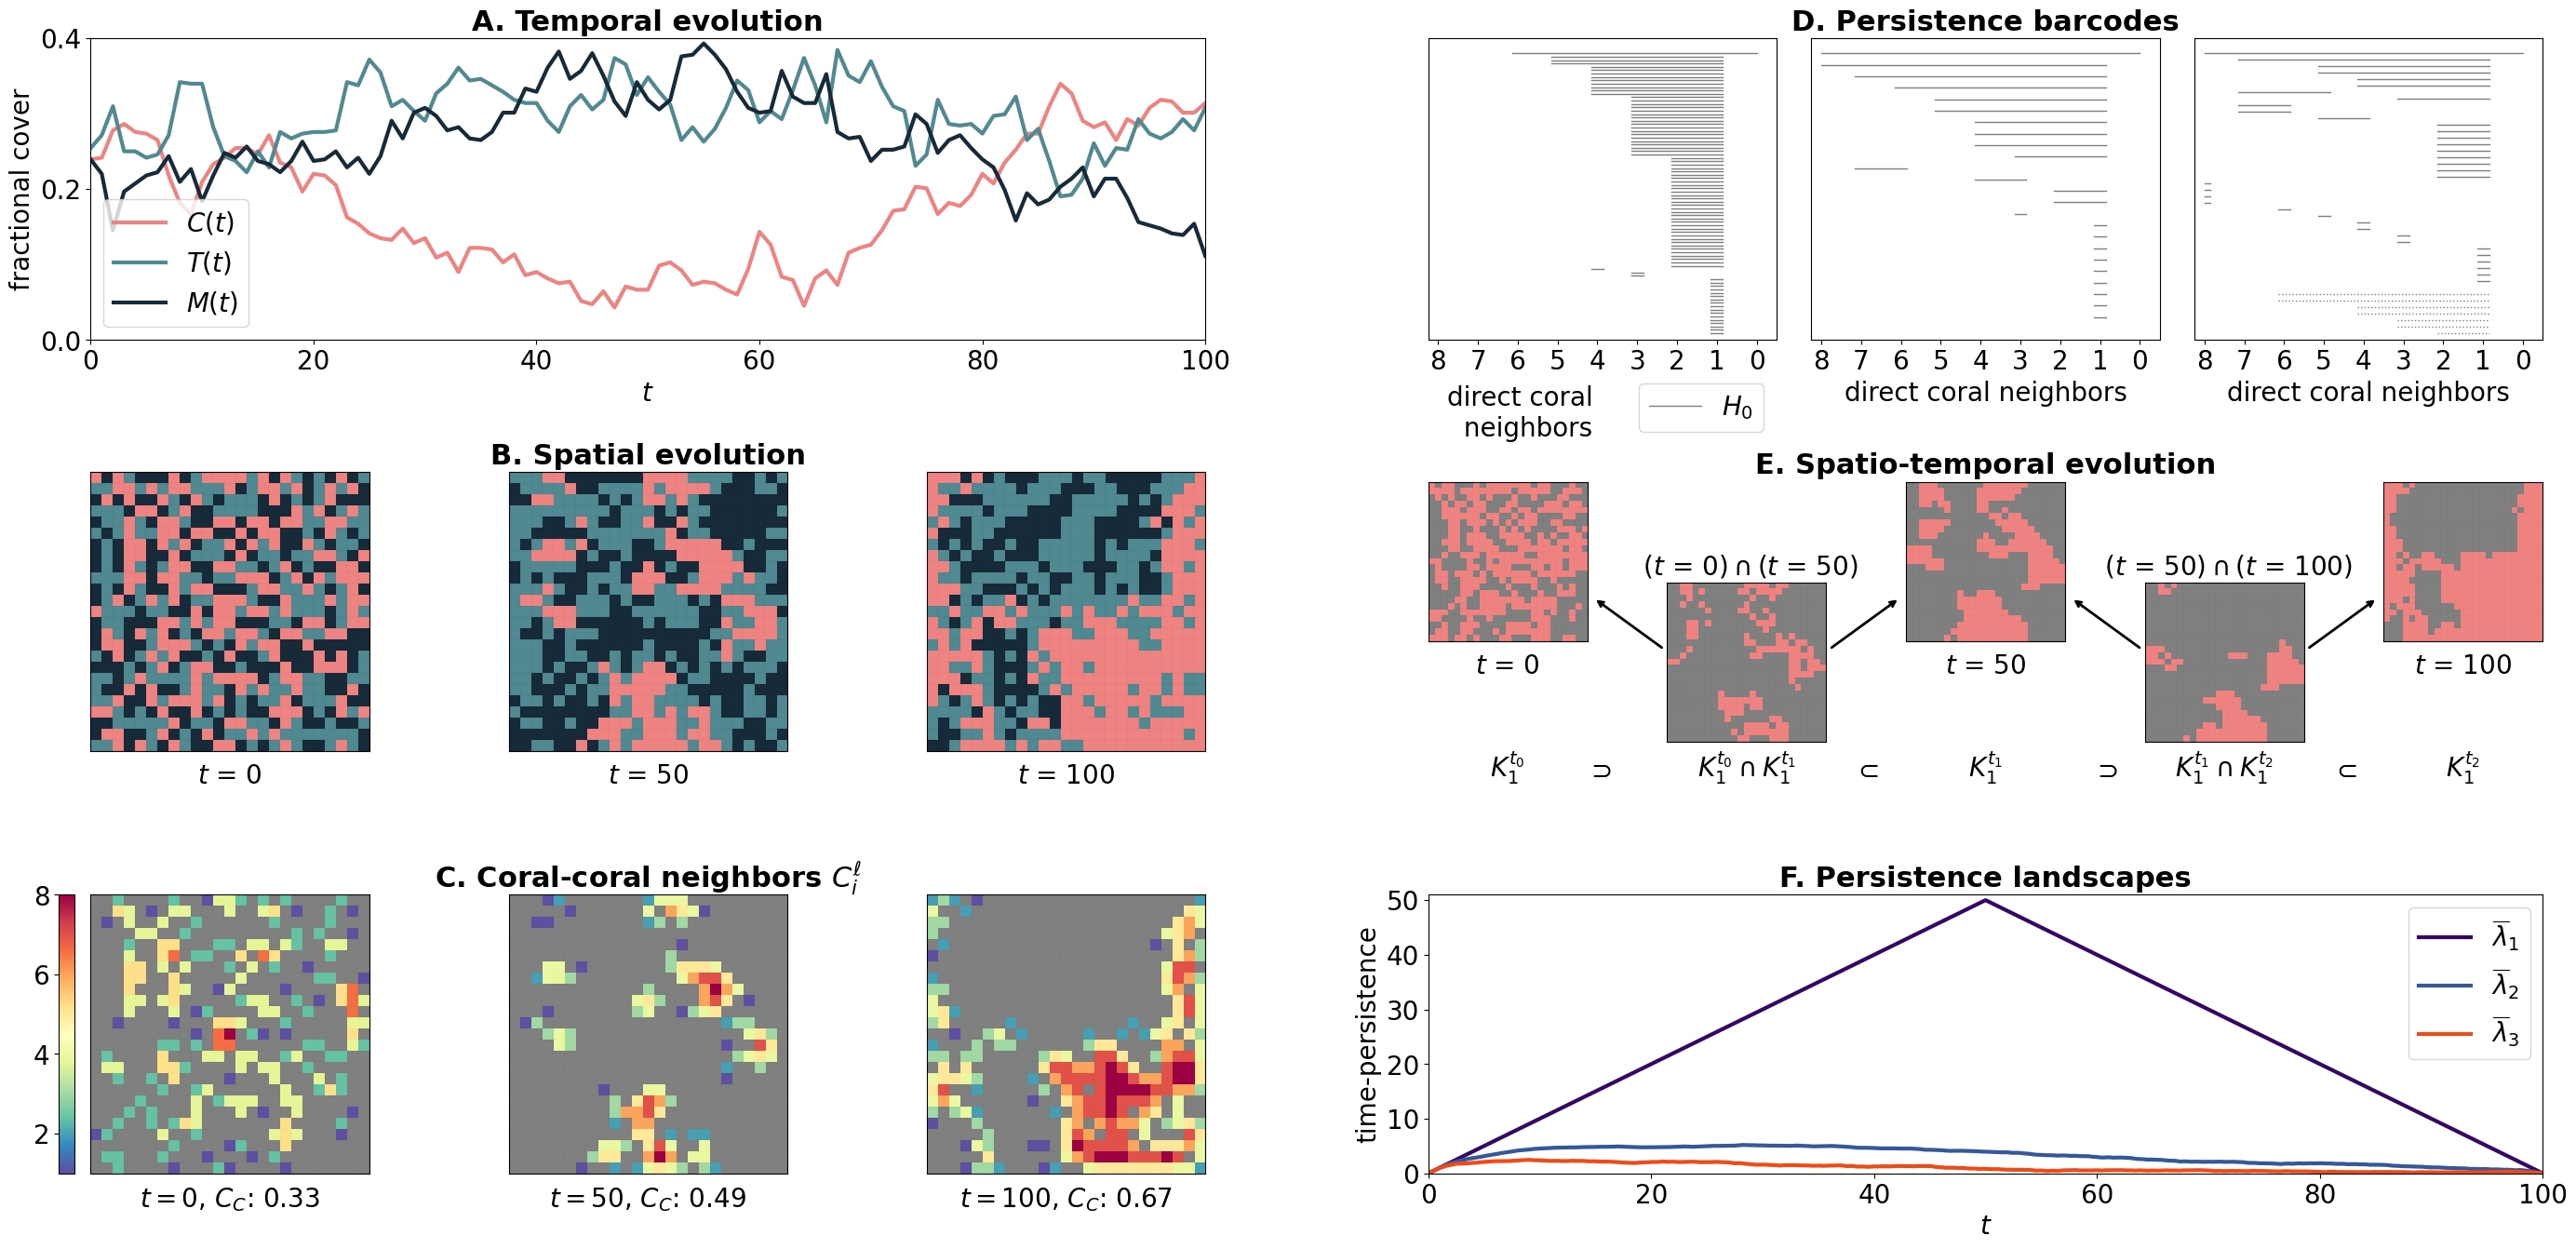

In [52]:
fig

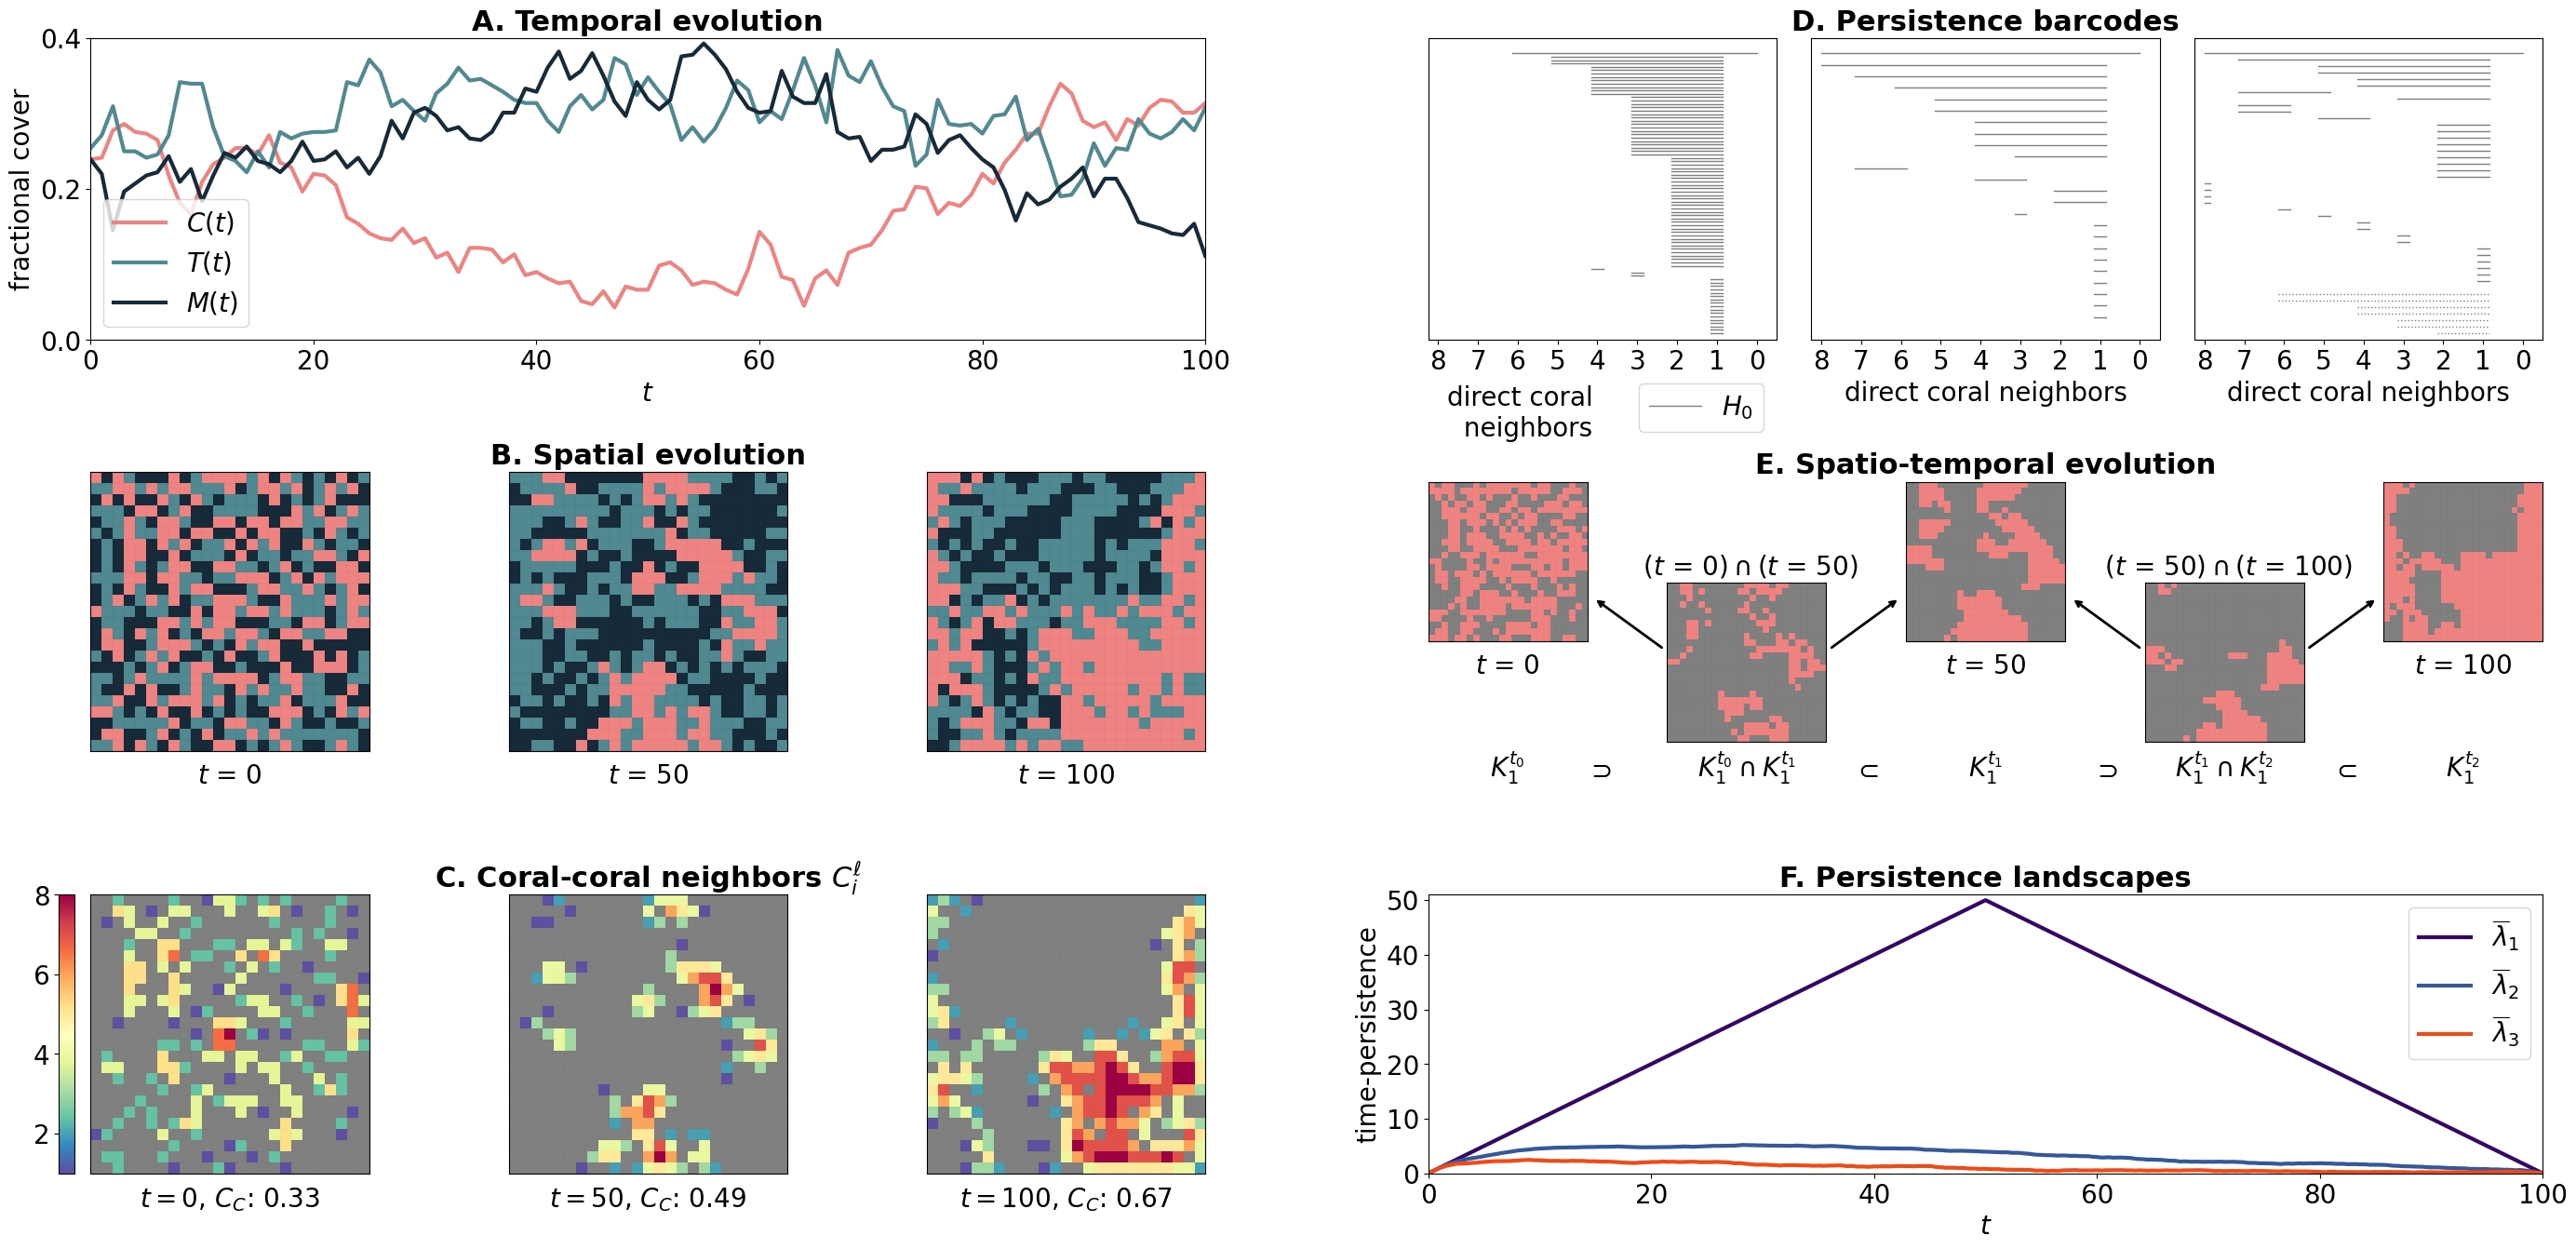

In [53]:
fig.savefig('./figures/paper/2_metric_examples/fig2.pdf', bbox_inches = "tight")
fig